In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Sep 22 18:01:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -r /content/drive/MyDrive/RGELAN/requirements.txt

# k cross validation

In [ ]:
import os
import yaml
import shutil

# Define paths
yolov9_path = '/content/drive/MyDrive/yolov9'  # Update with the path to YOLOv9 directory
custom_yaml_path = '/content/drive/MyDrive/yolov9/data/coco.yaml'  # Update with the path to custom.yaml
data_path = '/content/drive/MyDrive/Folds'


In [ ]:
# Function to create training folders for each fold
def create_train_folders(train_folders, n):
    for idx, folder in enumerate(train_folders):
        train_folder = f'/content/drive/MyDrive/Folds/train{n}'
        os.makedirs(os.path.join(train_folder, 'images'), exist_ok=True)
        os.makedirs(os.path.join(train_folder, 'labels'), exist_ok=True)

        # Copy images and labels from original training folders
        images_src = os.path.join(folder, 'images')
        labels_src = os.path.join(folder, 'labels')

        print(labels_src)

        images_dst = os.path.join(train_folder, 'images')
        labels_dst = os.path.join(train_folder, 'labels')

        print(images_dst)

        for image_file in os.listdir(images_src):
            shutil.copy(os.path.join(images_src, image_file), images_dst)

        for label_file in os.listdir(labels_src):
            shutil.copy(os.path.join(labels_src, label_file), labels_dst)

        # Count images and labels
        num_images = len(os.listdir(images_dst))
        num_labels = len(os.listdir(labels_dst))
    print(f"Train{n} - Images: {num_images}, Labels: {num_labels}")

    return train_folder


In [ ]:
import shutil
p = '/content/drive/MyDrive/Folds/train1'
shutil.rmtree(p)

In [ ]:
# Function to train YOLOv9
def train_yolov9(train_folders, val_folder, fold_idx):
    # Load custom.yaml
    with open(custom_yaml_path, 'r') as file:
        yaml_content = yaml.safe_load(file)

    # Update train and val paths
    yaml_content['path'] = data_path
    yaml_content['train'] = train_folders
    yaml_content['val'] = val_folder

    print(yaml_content['val'])

    # Write the updated YAML content back to the file
    with open(custom_yaml_path, 'w') as file:
        yaml.dump(yaml_content, file)

    !python {yolov9_path}/train.py --img 640 --batch 8 --epochs 150 --min-items 0 --data {custom_yaml_path} --cfg {yolov9_path}/models/detect/ne-rcs-gelan-c-v32.yaml --hyp {yolov9_path}/data/hyps/hyp.scratch-high.yaml --device 0 --name fold{fold_idx} #I should change device cpu(to 0)


# Get list of fold directories
fold_directories = [f'/content/drive/MyDrive/Folds/fold_{i+1}' for i in range(5)]

# Iterate over each fold for validation
for fold_idx, val_folder in enumerate(fold_directories):

    if fold_idx == 4:
      print(f"Training on fold {fold_idx + 1}...")

      # Define training folders (all other folds)
      train_folders = fold_directories[:fold_idx] + fold_directories[fold_idx + 1:]

      # Create training folders for the current fold
      train_fold = create_train_folders(train_folders, fold_idx + 1)
      print(train_fold)

      # Train YOLOv9 on the current fold
      train_yolov9(train_fold, val_folder, fold_idx + 1)



Training on fold 5...
/content/drive/MyDrive/Folds/fold_1/labels
/content/drive/MyDrive/Folds/train5/images
/content/drive/MyDrive/Folds/fold_2/labels
/content/drive/MyDrive/Folds/train5/images
/content/drive/MyDrive/Folds/fold_3/labels
/content/drive/MyDrive/Folds/train5/images
/content/drive/MyDrive/Folds/fold_4/labels
/content/drive/MyDrive/Folds/train5/images
Train5 - Images: 401, Labels: 401
/content/drive/MyDrive/Folds/train5
/content/drive/MyDrive/Folds/fold_5
2024-09-09 13:14:24.157750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 13:14:24.177251: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 13:14:24.183433: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [ ]:
sx

In [ ]:
#RCS-GELAN

# Function to train YOLOv9
def train_yolov9(train_folders, val_folder, fold_idx):
    # Load custom.yaml
    with open(custom_yaml_path, 'r') as file:
        yaml_content = yaml.safe_load(file)

    # Update train and val paths
    yaml_content['path'] = data_path
    yaml_content['train'] = train_folders
    yaml_content['val'] = val_folder

    print(yaml_content['val'])

    # Write the updated YAML content back to the file
    with open(custom_yaml_path, 'w') as file:
        yaml.dump(yaml_content, file)

    !python {yolov9_path}/train.py --img 640 --batch 8 --epochs 150 --min-items 0 --close-mosaic 15 --data {custom_yaml_path} --cfg {yolov9_path}/models/detect/ne-rcs-gelan-c-v32.yaml --hyp {yolov9_path}/data/hyps/hyp.scratch-high.yaml --device 0 --name fold{fold_idx} #I should change device cpu(to 0)


# Get list of fold directories
fold_directories = [f'/content/drive/MyDrive/Folds/fold_{i+1}' for i in range(5)]

# Iterate over each fold for validation
for fold_idx, val_folder in enumerate(fold_directories):
    print(f"Training on fold {fold_idx + 1}...")

    # Define training folders (all other folds)
    train_folders = fold_directories[:fold_idx] + fold_directories[fold_idx + 1:]

    # Create training folders for the current fold
    train_fold = create_train_folders(train_folders, fold_idx + 1)
    print(train_fold)

    # Train YOLOv9 on the current fold
    train_yolov9(train_fold, val_folder, fold_idx + 1)

# After training, you can aggregate and analyze the results as needed


Training on fold 1...
/content/drive/MyDrive/Folds/fold_2/labels
/content/drive/MyDrive/Folds/train1/images
/content/drive/MyDrive/Folds/fold_3/labels
/content/drive/MyDrive/Folds/train1/images
/content/drive/MyDrive/Folds/fold_4/labels
/content/drive/MyDrive/Folds/train1/images
/content/drive/MyDrive/Folds/fold_5/labels
/content/drive/MyDrive/Folds/train1/images
Train1 - Images: 399, Labels: 399
/content/drive/MyDrive/Folds/train1
/content/drive/MyDrive/Folds/fold_1
2024-09-09 14:18:26.331207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 14:18:26.351964: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 14:18:26.358133: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

# training on brain dataset

In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 150 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v32.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml
#anchors 3

2024-09-10 10:48:40.500149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 10:48:40.519795: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 10:48:40.526329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 10:48:40.540561: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 10:48:41.757098: W tensorflow/compiler/tf2

In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 150 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v32.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml

2024-09-10 12:30:58.027300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 12:30:58.047364: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 12:30:58.053633: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 12:30:58.069564: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 12:30:59.277507: W tensorflow/compiler/tf2

In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 150 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/gelan-c.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml

In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 300 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v39.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml

#anchors =6

2024-09-11 03:10:17.273230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 03:10:17.292622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 03:10:17.299250: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 03:10:17.313046: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 03:10:18.506288: W tensorflow/comp

Our chosen architecture with high score


In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 500 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v39.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml

#anchors =6

2024-09-11 13:03:11.592869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 13:03:11.613171: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 13:03:11.618932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 13:03:11.634268: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 13:03:12.821615: W tensorflow/comp

In [ ]:
import os
import numpy as np
from sklearn.cluster import KMeans
import yaml

# Load dataset annotations (width, height)
def load_annotations(data_yaml_path):
    # Load data.yaml file to get dataset path
    with open(data_yaml_path, 'r') as f:
        data_yaml = yaml.safe_load(f)

    # Define paths to dataset files
    train_path = data_yaml['train']  # Path to training set
    labels_dir = os.path.join(train_path, 'labels')  # Assuming labels are stored here

    # Gather all width, height pairs of objects
    boxes = []
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as f:
                for line in f:
                    # Assuming YOLO format: class, x_center, y_center, width, height
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        width = float(parts[3])
                        height = float(parts[4])
                        boxes.append([width, height])

    return np.array(boxes)

# Apply K-Means clustering to calculate anchors
def calculate_anchors(boxes, num_anchors):
    kmeans = KMeans(n_clusters=num_anchors, random_state=0).fit(boxes)
    return kmeans.cluster_centers_

# Save calculated anchors to your YOLO config
def save_anchors_to_yaml(anchor_boxes, yaml_path):
    with open(yaml_path, 'r') as f:
        model_yaml = yaml.safe_load(f)

    # Update the anchor boxes
    model_yaml['anchors'] = anchor_boxes.tolist()

    # Save the updated YAML
    with open(yaml_path, 'w') as f:
        yaml.dump(model_yaml, f)

if __name__ == "__main__":
    data_yaml_path = '/content/drive/MyDrive/RGELAN/data/coco.yaml'  # Path to your data.yaml file
    model_yaml_path = '/content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v32.yaml'  # Path to your model config

    num_anchors = 6  # Adjust this based on your architecture

    # Load dataset annotations and calculate anchors
    boxes = load_annotations(data_yaml_path)
    anchors = calculate_anchors(boxes, num_anchors)

    print(f"Calculated anchors: {anchors}")

    # Save anchors to model configuration
    save_anchors_to_yaml(anchors, model_yaml_path)
    print(f"Anchors saved to {model_yaml_path}")


Calculated anchors: [[    0.33937     0.35937]
 [    0.23279     0.21814]
 [   0.092222    0.083889]
 [    0.29368        0.27]
 [    0.16397     0.15666]
 [    0.43879     0.46758]]
Anchors saved to /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v32.yaml


In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 150 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v32.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml

2024-09-10 19:02:16.140171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 19:02:16.160435: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 19:02:16.166530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 19:02:16.180886: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 19:02:17.379631: W tensorflow/comp

Actual one

In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py --save-period 20 --resume /content/drive/MyDrive/RGELAN/runs/train/exp71/weights/epoch260.pt\
--batch 8 --epochs 500 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v39.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml


2024-09-23 09:18:20.401946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 09:18:20.421672: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 09:18:20.429193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 09:18:20.443432: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 09:18:21.634229: W tensorflow/comp

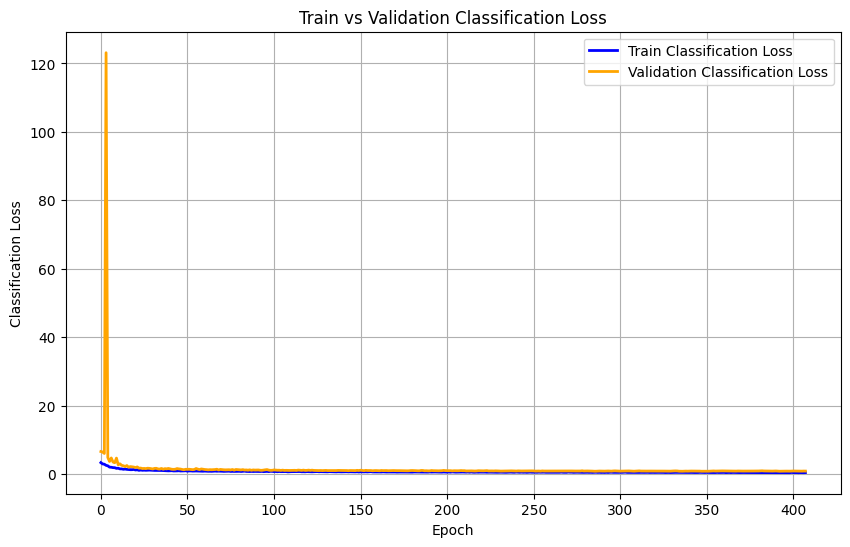

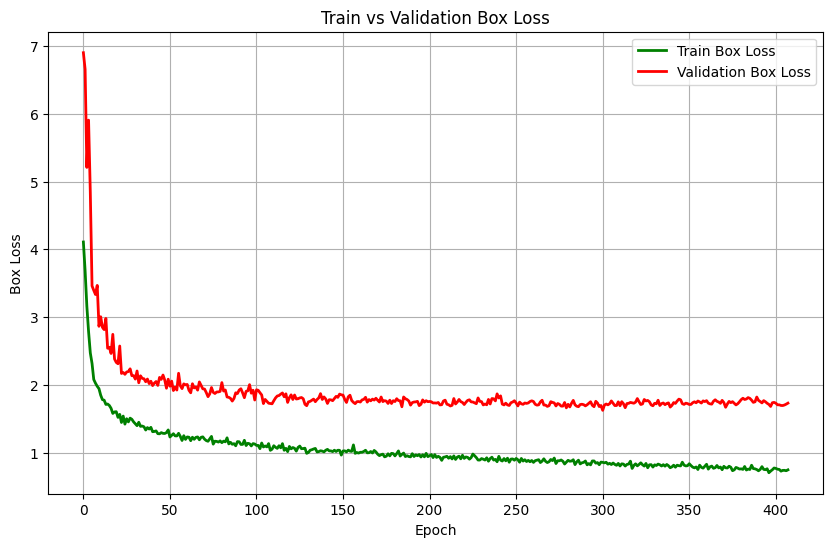

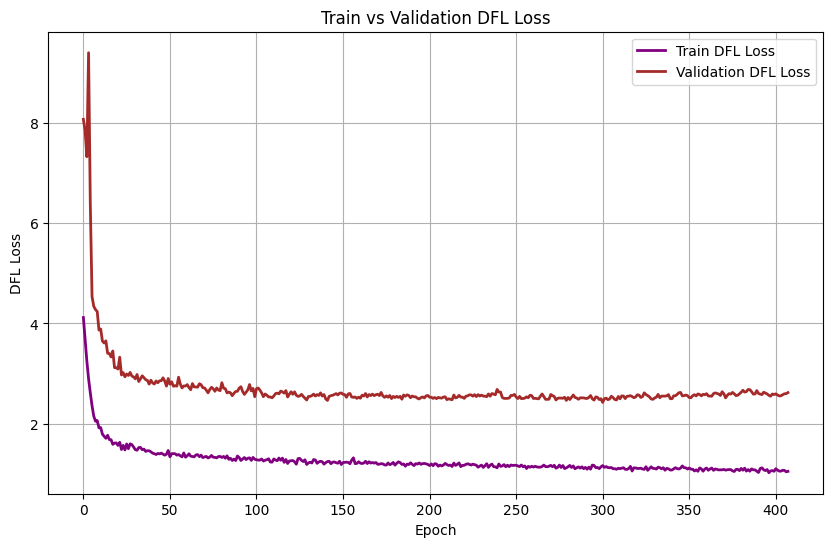

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/drive/MyDrive/RGELAN/runs/train/exp71/results.csv' # -----> Change this depending on the folder where results are saved <-----
data = pd.read_csv(file_path)

# Plotting train/cls_loss and val/cls_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/cls_loss'], label='Train Classification Loss', color='blue', linewidth=2)
plt.plot(data['        val/cls_loss'], label='Validation Classification Loss', color='orange', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/box_loss and val/box_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/box_loss'], label='Train Box Loss', color='green', linewidth=2)
plt.plot(data['        val/box_loss'], label='Validation Box Loss', color='red', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/dfl_loss and val/dfl_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/dfl_loss'], label='Train DFL Loss', color='purple', linewidth=2)
plt.plot(data['        val/dfl_loss'], label='Validation DFL Loss', color='brown', linewidth=2)

# Labels and Title
plt.title('Train vs Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.legend()
plt.grid(True)
plt.show()

# yolov8 on brain

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_DIR = '/content/drive/MyDrive/yolov9/data'

In [ ]:
# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "coco.yaml"), epochs=150)  # train the model


100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov9/data/coco.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/MyDrive/brain/TRAIN/labels... 500 images, 3 backgrounds, 0 corrupt: 100%|██████████| 500/500 [03:07<00:00,  2.66it/s]


train: New cache created: /content/drive/MyDrive/brain/TRAIN/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/brain/VAL/labels... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [01:15<00:00,  2.67it/s]

val: New cache created: /content/drive/MyDrive/brain/VAL/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.29G      1.285      2.716      1.375         14        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        201        240          1     0.0556      0.501      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.17G      1.176       1.81      1.257          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.457      0.237      0.289      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       2.2G      1.202      1.714      1.262          8        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        201        240       0.67      0.321      0.378      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.18G      1.181       1.53      1.262          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.522      0.279      0.327      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.18G      1.202      1.453      1.276          8        640: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        240       0.53       0.39      0.445      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.18G       1.18      1.334      1.262          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


                   all        201        240      0.529      0.487       0.45      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.18G      1.152      1.251       1.26          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        201        240      0.852      0.583      0.741      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.18G      1.164      1.191       1.28         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]


                   all        201        240      0.781      0.741      0.796      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.18G      1.123      1.114      1.224         10        640: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


                   all        201        240      0.824      0.713      0.793      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.18G       1.03     0.9486      1.165         11        640: 100%|██████████| 32/32 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.802      0.778      0.836       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.18G       1.08     0.9977      1.191          9        640: 100%|██████████| 32/32 [00:09<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


                   all        201        240       0.84      0.771      0.848      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.18G      1.112      1.012      1.231          6        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        201        240      0.843      0.742      0.782      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.18G        1.1     0.9755      1.217          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        201        240      0.928      0.757      0.876      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.19G      1.041     0.9332      1.175          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.872      0.754      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.18G      1.076     0.9068      1.207          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        201        240      0.811      0.787      0.865      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.18G       1.03      0.858      1.183          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.924      0.758      0.871        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.18G      1.007     0.8185      1.159          6        640: 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240       0.87      0.817       0.89      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.18G      1.031     0.8318      1.167          7        640: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240      0.895      0.825        0.9      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.18G      1.019     0.7993      1.172         14        640: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.831      0.817      0.864      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.18G      1.016     0.8136      1.179          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.848      0.779      0.854      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.19G     0.9981     0.7991      1.155          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.897      0.834      0.926      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.18G      1.011      0.818      1.169         10        640: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        201        240      0.939      0.836      0.921       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.18G      1.003     0.7829      1.163          5        640: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


                   all        201        240      0.968      0.783      0.907       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.18G       1.03     0.7783      1.172          8        640: 100%|██████████| 32/32 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        240      0.941      0.803      0.907      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.18G      1.024      0.796      1.156          4        640: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        201        240      0.895      0.838      0.919      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.18G     0.9726     0.7516      1.131          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        201        240      0.917      0.792      0.899       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.18G     0.9906     0.7702      1.156          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        201        240      0.931      0.821      0.917      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.18G       1.03      0.803      1.195         12        640: 100%|██████████| 32/32 [00:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        201        240       0.96      0.833      0.934       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.18G     0.9442     0.7207      1.118          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        201        240      0.873      0.867      0.926      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.18G     0.9496     0.7417      1.135          8        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.927      0.843      0.929      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.18G     0.9705     0.7322      1.117          5        640: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        201        240      0.885      0.846      0.919      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.18G     0.9606     0.7066      1.124          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        201        240      0.909      0.858      0.939      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.18G     0.9144      0.689      1.099         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.948       0.84      0.912       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.18G     0.9171     0.6797      1.109          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        201        240      0.921      0.875      0.924      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.18G     0.9511     0.7098      1.137          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        201        240      0.935      0.839      0.937      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.18G     0.9513     0.7129      1.106         14        640: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        201        240      0.927      0.852      0.909      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.18G     0.9415     0.7072       1.12         10        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


                   all        201        240      0.888      0.887      0.938       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.18G     0.9632      0.714       1.13         12        640: 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        201        240      0.926      0.883      0.929      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.18G     0.9504     0.6929      1.118          9        640: 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.901      0.829      0.916      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.19G     0.8905     0.6619      1.087          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240      0.934      0.884      0.936      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.18G     0.9136     0.6579      1.101          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        201        240      0.958      0.833       0.92      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.18G     0.8887     0.6322      1.085          5        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        201        240      0.934       0.89      0.952      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.18G     0.9072     0.6283      1.104         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        201        240      0.921      0.829      0.929       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.19G     0.8608     0.6222      1.088          7        640: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.918      0.883      0.944      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.19G     0.8711     0.6305      1.086          8        640: 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        201        240      0.911      0.879      0.931      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.19G     0.8727     0.6363      1.102          8        640: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.887      0.885      0.922      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.19G     0.8843     0.6301      1.094          7        640: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240      0.889      0.871      0.925      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.18G     0.8692       0.64      1.086         13        640: 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


                   all        201        240      0.942      0.867      0.952      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.18G     0.8893     0.6502      1.103          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.924      0.912      0.952      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.18G     0.8935     0.6192      1.088         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        201        240      0.942      0.896      0.956        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.19G      0.865     0.6008      1.069          7        640: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.976      0.829      0.916      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.19G     0.8626     0.6222      1.059          5        640: 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.946      0.876      0.942      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.18G     0.8711     0.6155      1.086          8        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        201        240      0.939      0.896      0.948      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.18G     0.8461      0.603      1.068          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240      0.955      0.883      0.959      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.18G     0.8621      0.618      1.092          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]


                   all        201        240      0.939       0.89      0.937      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.18G     0.8523     0.6026      1.084          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.946      0.872      0.955      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.18G      0.831     0.5745      1.054         12        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]


                   all        201        240      0.927      0.883      0.949      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.19G     0.8449     0.5977      1.067          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        201        240      0.899        0.9      0.924      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.18G     0.8713        0.6      1.081          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.963      0.883      0.939      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.18G      0.832     0.5914      1.064          4        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        201        240      0.933      0.912      0.959      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.19G     0.8432     0.5955      1.064         10        640: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        201        240      0.981      0.879      0.964      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.18G     0.8369     0.5972       1.08          5        640: 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240      0.958      0.867       0.95      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.19G     0.8392     0.6089      1.064          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        201        240      0.933      0.912      0.953      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.18G     0.8482     0.5903      1.075          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        201        240      0.977      0.892      0.961      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.18G     0.8337     0.5595      1.057          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        201        240      0.923      0.895      0.945       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.18G     0.8235     0.5598       1.06          4        640: 100%|██████████| 32/32 [00:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        201        240      0.964      0.896      0.956      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.18G     0.8256     0.5597      1.073         11        640: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        201        240      0.926      0.887      0.941      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.18G     0.8131     0.5768      1.061          7        640: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        201        240      0.978      0.917      0.965      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.18G     0.8424     0.5681      1.069         11        640: 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        201        240      0.973      0.885      0.952      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.18G     0.7959     0.5331      1.032          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.955      0.892      0.949      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.19G     0.8341     0.5564      1.054          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240       0.96      0.901      0.961      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.18G     0.7966     0.5244      1.039         10        640: 100%|██████████| 32/32 [00:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        201        240      0.973      0.897       0.96      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.18G     0.7938     0.5288      1.041          4        640: 100%|██████████| 32/32 [00:11<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.973      0.883      0.957        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.18G      0.785     0.5272      1.046          6        640: 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240       0.96      0.906      0.954      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150       2.2G     0.7836     0.5305       1.03         10        640: 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        201        240      0.972      0.883      0.953      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.18G     0.7957     0.5331      1.038          9        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240      0.948      0.919      0.961      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.19G     0.7707     0.5125       1.03          7        640: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        201        240      0.964        0.9      0.955      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.18G     0.7865     0.5288      1.034         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240      0.975      0.908      0.962        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.19G      0.769     0.5332      1.041          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        240      0.951      0.867      0.948      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.18G     0.7887     0.5157      1.043          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        201        240      0.974      0.883      0.959      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.18G     0.7676     0.5078      1.029          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        201        240      0.952      0.904      0.961      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.18G     0.7753     0.4994      1.041         10        640: 100%|██████████| 32/32 [00:10<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.932      0.908      0.958      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.18G     0.8039     0.5399      1.046          6        640: 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        201        240      0.962      0.896      0.952      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.18G      0.804     0.5255      1.025         11        640: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.972      0.921      0.964      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.18G     0.7882     0.5146      1.034         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.953      0.923      0.944      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.18G      0.757     0.4987      1.021          5        640: 100%|██████████| 32/32 [00:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        201        240      0.932      0.917      0.956      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.19G     0.7668     0.4861      1.034          5        640: 100%|██████████| 32/32 [00:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        201        240      0.954        0.9       0.95      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.18G     0.7868     0.4817      1.031          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        201        240      0.959      0.887      0.954      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.18G     0.7813     0.5011      1.039         11        640: 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.955      0.904      0.959      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.18G     0.7597     0.4991      1.032          8        640: 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.952      0.896       0.95        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150       2.2G     0.7366     0.4722      1.017         12        640: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        201        240      0.925      0.933      0.953      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.18G     0.7314     0.4791          1          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        201        240      0.972      0.874      0.948      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.18G     0.7785     0.4954       1.03          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        201        240      0.953      0.883      0.942      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.18G     0.7509     0.4927      1.015          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        201        240      0.937      0.933      0.969      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.18G     0.7272     0.4693      1.004         11        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        201        240      0.969      0.897      0.971      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.18G     0.7535     0.4687      1.019          6        640: 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.964      0.894      0.954      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.18G     0.7375     0.4812      1.015          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.943      0.902      0.956      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.18G     0.7419     0.4789      1.012          8        640: 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        201        240      0.965      0.912      0.961      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.18G     0.7297     0.4699     0.9907          5        640: 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.957      0.887      0.954      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.18G     0.7454     0.4818      1.017         10        640: 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]

                   all        201        240      0.947      0.895      0.956      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.18G     0.7532     0.4847      1.019          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        201        240      0.972      0.904      0.955      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.18G     0.7391     0.4612      1.009          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        201        240      0.949      0.922      0.961      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.18G     0.7209     0.4634          1         15        640: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.963      0.872      0.955       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.18G     0.7237     0.4613      1.004          8        640: 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        201        240      0.942      0.917      0.962      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.18G     0.7154     0.4644     0.9984          6        640: 100%|██████████| 32/32 [00:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        201        240      0.944      0.896      0.959      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.18G      0.715     0.4633      1.005         13        640: 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240      0.931      0.894      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.18G     0.7164     0.4457     0.9972          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        201        240      0.964      0.906      0.964      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.18G     0.6938     0.4293       0.99          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]

                   all        201        240      0.973      0.895      0.967      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.18G      0.681      0.422     0.9874         12        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240      0.945      0.931      0.967       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.18G     0.7116     0.4396      1.002          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.968      0.912      0.972      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.18G     0.7157     0.4715      1.013          8        640: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.965      0.907      0.964       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.19G     0.6998     0.4376          1          8        640: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.969      0.912      0.958      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.18G     0.6756     0.4238     0.9831          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        201        240       0.99      0.879      0.955      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.18G     0.6628     0.4054     0.9717          5        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        201        240      0.979      0.892      0.957      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.18G     0.6983     0.4576      1.012          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.977      0.891      0.959      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.18G     0.7001     0.4315      1.016          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        201        240      0.956      0.903      0.956      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.18G     0.7128     0.4432     0.9957         12        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        201        240      0.983      0.892      0.962      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.18G     0.6702     0.4253     0.9787          5        640: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        201        240       0.96      0.896      0.967       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.18G     0.7005     0.4268     0.9958          6        640: 100%|██████████| 32/32 [00:10<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.951      0.898       0.96      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.18G     0.6821     0.4238     0.9861         12        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        201        240      0.971      0.883      0.961      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.18G     0.7098     0.4286     0.9946         10        640: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        201        240      0.959      0.896      0.958      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.18G     0.6796     0.4308     0.9902          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240       0.96      0.907      0.956      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.18G     0.6783     0.4337     0.9944          3        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        201        240      0.952      0.905      0.956      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.18G      0.658     0.3975      0.979          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.956      0.912      0.962      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.18G     0.6363      0.385     0.9669          5        640: 100%|██████████| 32/32 [00:10<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.969      0.911      0.961      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.18G     0.6548     0.4173     0.9736          4        640: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        201        240      0.976      0.887      0.955      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.18G     0.6507     0.3967     0.9626         13        640: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        201        240      0.969      0.906       0.96      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.19G      0.647     0.4025     0.9758         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        201        240      0.977      0.904      0.961      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.19G     0.6229      0.386     0.9643          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        201        240      0.961      0.923      0.961      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.18G     0.6601     0.3991      0.989          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240      0.986      0.908       0.96      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.18G      0.649     0.4049     0.9903          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240      0.984        0.9      0.961      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.18G     0.6585     0.3937     0.9753          5        640: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.978      0.912      0.961       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.18G     0.6299     0.4096     0.9738          4        640: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.949      0.935      0.959      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.18G     0.6431     0.4003     0.9716         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.951        0.9      0.955      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.18G     0.6466     0.3943     0.9815          7        640: 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        201        240      0.956      0.907      0.954      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.18G     0.6325     0.3901     0.9629          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        201        240      0.963      0.921      0.957      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.18G     0.6439     0.3947     0.9769         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        201        240       0.97      0.921      0.956      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.18G     0.6275     0.3886     0.9748          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.973      0.916       0.96      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.18G     0.6424     0.3912     0.9708         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        201        240      0.978      0.915      0.959      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.17G     0.6377     0.3822     0.9686          4        640: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        240      0.968      0.908      0.956       0.71


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.18G     0.5639     0.3195     0.9088          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        201        240      0.957      0.916      0.955      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.18G     0.5482     0.3001     0.8883          4        640: 100%|██████████| 32/32 [00:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.963      0.917      0.954      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.18G     0.5513     0.3149     0.9005          4        640: 100%|██████████| 32/32 [00:09<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240      0.957       0.93      0.957      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.17G     0.5346     0.2999     0.8903          4        640: 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        201        240      0.945      0.928      0.957      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.18G     0.5484     0.3041     0.8838          4        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        201        240      0.969      0.903      0.958      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.18G     0.5131     0.2878     0.8871          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        201        240      0.968      0.904      0.957      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.18G     0.5383     0.2978      0.895          5        640: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.977      0.899      0.957      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.17G     0.5226     0.2826     0.8857          4        640: 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        201        240      0.982      0.903      0.957      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.17G     0.5284     0.2878     0.8842          4        640: 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        201        240      0.969      0.909      0.957      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.18G     0.5357     0.2936     0.8871          5        640: 100%|██████████| 32/32 [00:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


                   all        201        240      0.973      0.904      0.957      0.708

150 epochs completed in 0.663 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]


                   all        201        240      0.956      0.912      0.962      0.726
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train


In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 150 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/RGELAN/data/coco2.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml


train: weights=, cfg=/content/drive/MyDrive/RGELAN/models/detect/rcs-gelan-c.yaml, data=/content/drive/MyDrive/RGELAN/data/coco2.yaml, hyp=/content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=drive/MyDrive/RGELAN/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Traceback (most recent call last):
  File "/content/drive/MyDrive/RGELAN/train.py", line 634, in <module>
    main(opt)
  File "/content/drive/MyDrive/RGELAN/train.py", line 503, in main
    check_file(opt.data)

**Yolov10 on Brain**

In [ ]:
pip install opencv-python ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 52.1 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO

In [ ]:
ROOT_DIR = '/content/drive/MyDrive'

In [ ]:
import os
#YOLOV10m
# Load a model
model = YOLO("yolov10m.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "coco.yaml"), epochs=150)  # train the model

100%|██████████| 32.1M/32.1M [00:00<00:00, 119MB/s]


Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/drive/MyDrive/coco.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 25.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/brain/TRAIN/labels... 500 images, 3 backgrounds, 0 corrupt: 100%|██████████| 500/500 [03:28<00:00,  2.39it/s]


train: New cache created: /content/drive/MyDrive/brain/TRAIN/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/brain/VAL/labels... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [01:20<00:00,  2.49it/s]

val: New cache created: /content/drive/MyDrive/brain/VAL/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      9.14G      2.774      10.68      3.214         14        640: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        201        240    0.00356      0.308    0.00244   0.000862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      9.05G      2.958      3.916      3.363          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        240    0.00356      0.308    0.00244   0.000862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      9.01G      3.137       3.58      3.519          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        240    0.00356      0.308    0.00244   0.000862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.95G      3.125      3.514      3.433          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        201        240    0.00356      0.308    0.00244   0.000862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.95G      2.989      3.055      3.371          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        201        240    0.00356      0.308    0.00244   0.000862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.95G      2.974      3.148      3.347          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240     0.0911      0.025     0.0096    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.95G      2.802      2.803      3.226          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.286      0.329      0.255      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.95G      2.841      2.707      3.285         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.535      0.496      0.464      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.95G      2.649       2.61      3.131         10        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.734      0.617      0.687      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.95G      2.514      2.272       2.98         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        201        240      0.657      0.375      0.416      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.95G      2.518      2.242      3.012          9        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240      0.773      0.696       0.73       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.95G      2.554      2.283      3.046          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.665      0.563      0.582      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.95G      2.577      2.412      3.078          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.787      0.658      0.714      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.95G      2.436      2.262      2.937          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.754      0.691      0.759      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.95G      2.458      2.012      2.937          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        240      0.752      0.679      0.739      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.95G        2.4      2.161      2.942          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.786      0.583      0.685       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.95G       2.27       2.03      2.819          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.787      0.704      0.774      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.95G      2.324      1.952      2.848          7        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.808      0.758      0.793      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.95G      2.295       1.83      2.819         14        640: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.836      0.692      0.773      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.95G      2.299      1.906      2.824          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.862      0.725      0.803      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.95G      2.301      1.929      2.846          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        201        240      0.849      0.658      0.777      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.95G      2.273      1.909      2.824         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        201        240        0.7      0.596      0.663      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.95G      2.277       1.84      2.847          5        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.849      0.704      0.799      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.95G      2.354      1.907       2.87          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.818      0.725      0.772      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.95G       2.25      1.891      2.757          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.823      0.708      0.762      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.95G      2.229      1.853      2.726          9        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240      0.747      0.696       0.75      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.95G      2.351      1.876      2.893          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.781      0.682      0.753      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.95G      2.403      1.937       2.99         12        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.866      0.658      0.771       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.95G       2.16      1.725      2.715          6        640: 100%|██████████| 32/32 [00:21<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.873      0.713       0.81      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.95G       2.18      1.678      2.767          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        201        240      0.833      0.675      0.787      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.95G      2.192      1.661      2.737          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.855      0.736      0.826      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.95G      2.105      1.568      2.695          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.891      0.754      0.852      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.95G      2.135       1.62      2.689         11        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.769      0.746        0.8      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      8.95G      2.075      1.573      2.686          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        201        240      0.846      0.742      0.807      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.95G      2.117      1.669        2.7          9        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.833      0.707      0.826      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.95G      2.119      1.656      2.637         14        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.802      0.725      0.807      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.95G      2.119      1.598      2.699         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        201        240      0.885      0.679      0.805       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.95G      2.096      1.587      2.701         12        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


                   all        201        240      0.903      0.746      0.856      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.95G      2.109      1.544      2.688          9        640: 100%|██████████| 32/32 [00:21<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        201        240        0.9      0.712      0.843       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.97G      1.978      1.538      2.554          7        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        201        240      0.801      0.758      0.846      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.95G       2.01      1.478      2.632          7        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240       0.86      0.783      0.871      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.95G      1.988      1.489      2.634          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240      0.894      0.702      0.829      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.95G      2.016      1.464      2.596         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.846      0.725      0.824      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.95G      1.964      1.398      2.592          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        240      0.853       0.75      0.831      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.95G      1.997      1.455      2.607          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.865      0.679      0.818      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.95G      2.015      1.504      2.625          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.33it/s]

                   all        201        240      0.918      0.713      0.854      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.95G      2.008      1.407      2.584          7        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.721      0.688      0.752      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.95G      1.946      1.417      2.593         13        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        201        240      0.845       0.68      0.836      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      8.95G      2.014      1.531      2.634          6        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        201        240      0.851      0.742      0.849      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.95G      1.996      1.422      2.609         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.815      0.718      0.827      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.97G       1.94      1.364      2.566          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        201        240      0.886      0.775      0.875      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      8.95G       1.89       1.32      2.545          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240      0.913      0.733      0.859      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.95G      2.011      1.416      2.653          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.883      0.787      0.875      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.95G      1.953      1.382      2.545          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.862      0.758      0.855      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.95G      1.973      1.395        2.6          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        201        240      0.877      0.733      0.844      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.95G      1.944      1.386      2.575          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.865       0.72       0.86      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      8.95G      1.884        1.3      2.529         12        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.909      0.796      0.894       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      8.95G      1.942      1.344      2.579          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.778      0.743      0.802      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.95G      1.997      1.455      2.581          9        640: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.917      0.796      0.887      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.95G      1.903      1.421      2.569          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240       0.92      0.746      0.866      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.95G      1.914      1.348      2.535         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        201        240      0.862      0.808      0.885      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.95G      1.832      1.384      2.546          5        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.861      0.802      0.877      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.95G      1.851      1.267       2.51          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        240      0.891      0.814      0.893      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.95G      1.904      1.241       2.55          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        201        240      0.882      0.807      0.901      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.95G      1.894       1.24      2.534          9        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        201        240      0.965      0.783      0.912      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.95G      1.845      1.226      2.523          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        201        240      0.917      0.742      0.889       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.95G      1.865      1.274      2.576         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240        0.9      0.788      0.904      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      8.95G      1.846      1.315      2.502          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.881      0.771      0.878      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.95G      1.865      1.233      2.519         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240      0.893      0.783        0.9      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.95G      1.777      1.169      2.421          8        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]


                   all        201        240       0.92      0.816      0.913      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.95G       1.82      1.214      2.467          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.892      0.821      0.899      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.95G      1.767      1.185      2.453         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.906      0.843      0.913      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.95G      1.752      1.141      2.448          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.884      0.838      0.925      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.95G        1.8      1.168      2.503          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.915      0.796       0.91       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.96G      1.826      1.223      2.495         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.908      0.808      0.912      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      8.95G       1.78      1.191       2.46          9        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240      0.925      0.824      0.926      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.95G      1.716       1.09      2.372          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        240      0.907      0.817      0.916      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      8.95G      1.768      1.227      2.393         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.905      0.797      0.901      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.95G      1.743      1.224      2.452          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240      0.912      0.787      0.894      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      8.95G      1.706      1.168      2.418          7        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.888      0.829      0.907      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.95G      1.686      1.154      2.398          8        640: 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.895      0.856      0.913      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.95G      1.716      1.101      2.418         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        201        240      0.887       0.85      0.912       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.95G      1.764      1.151       2.48          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.826      0.829      0.883      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.95G      1.758      1.133      2.434         11        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        201        240      0.891      0.854      0.907      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.95G      1.769      1.086      2.433         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.927      0.792      0.908       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.95G      1.747      1.138      2.442          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240      0.882      0.809      0.911      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.95G      1.702      1.021      2.394          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.936      0.795      0.909       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.95G      1.719      1.114       2.39          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240       0.94      0.771      0.904      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      8.95G      1.712      1.124       2.42         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.914      0.838      0.933       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.95G      1.716      1.135      2.414          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240       0.93       0.83      0.913      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.95G      1.649     0.9998      2.351         12        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240       0.91      0.839      0.916      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.95G      1.616      1.071      2.336          9        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        201        240       0.93      0.835      0.931      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      8.95G      1.698      1.079      2.413          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.898      0.842      0.909      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.95G       1.69      1.189       2.39          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        240      0.953      0.821       0.93      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.95G      1.651      1.032      2.381         11        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.925      0.822      0.918      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.95G      1.665       1.07      2.406          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.925      0.804      0.923      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.95G      1.591      1.002      2.333          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.901      0.835       0.93      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.95G      1.633      1.058      2.334          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.946      0.803      0.908      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      8.95G       1.61       1.03        2.3          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.895      0.853       0.93      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.95G      1.671      1.064      2.396         10        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]


                   all        201        240      0.896      0.863      0.936      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      8.95G      1.654      1.029      2.361          7        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        201        240      0.942      0.819      0.925      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.95G      1.652     0.9995      2.342          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        201        240      0.908      0.842      0.914      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.95G      1.584       1.05      2.321         15        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


                   all        201        240      0.932      0.825       0.92      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.95G      1.617     0.9917      2.338          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.892      0.824      0.902      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.95G      1.619      1.065      2.334          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.871      0.846      0.916      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.96G      1.579       1.02      2.272         13        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.887       0.85      0.922      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.95G      1.569     0.9828      2.329          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        240      0.881      0.858      0.927      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.95G      1.573     0.9385      2.305          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.842      0.867      0.923      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.95G      1.495      0.939      2.289         12        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240       0.93      0.817       0.93      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.95G      1.581     0.9404      2.312          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.926      0.838      0.932      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.95G       1.62      1.009      2.374          8        640: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.891      0.882      0.935      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.95G      1.591     0.9675      2.322          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        201        240      0.904      0.864       0.94      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.95G      1.512     0.9447      2.296          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240       0.91      0.838      0.936      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.95G      1.479     0.8726      2.248          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.33it/s]

                   all        201        240      0.917       0.87      0.942      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.95G      1.557     0.9715      2.325          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]


                   all        201        240      0.895      0.858      0.933      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.95G      1.545     0.9413      2.322          7        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        201        240      0.932      0.833      0.934      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.95G      1.598     0.9522      2.309         12        640: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.948      0.835      0.947      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      8.95G      1.503     0.9304      2.264          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240        0.9       0.86       0.94      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.95G      1.518     0.9251      2.274          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.939      0.854      0.944      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.95G      1.497     0.9124       2.28         12        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.917      0.879      0.947        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.95G      1.566     0.9308      2.277         10        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240        0.9      0.887      0.939      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.95G      1.534     0.9664      2.294          9        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.955      0.842      0.938      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.95G      1.527     0.9781      2.309          3        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.937      0.846      0.942      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.95G      1.431     0.8592      2.237          7        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240       0.93      0.836      0.936      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.95G      1.403     0.8422      2.201          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.892       0.85      0.935      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.95G      1.499     0.9338      2.292          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.916      0.846      0.935      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.95G       1.43     0.8628      2.188         13        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.909      0.871      0.937      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.95G       1.46     0.8557      2.241         11        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        201        240       0.94      0.863      0.941      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.95G      1.373       0.84       2.18          7        640: 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        201        240      0.928      0.867      0.938      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.95G      1.474     0.8663      2.271          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        201        240      0.927      0.833      0.928      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.95G       1.44      0.877      2.284          6        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.904      0.867      0.943      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.95G      1.427     0.8073       2.21          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240      0.916      0.875       0.94      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.95G      1.407      0.901      2.253          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.894      0.879      0.939      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.95G      1.451     0.8511      2.243         10        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        201        240      0.947       0.82      0.934      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.95G      1.429     0.8278      2.244          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.932      0.854      0.939      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      8.95G      1.417     0.8309      2.234          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.928      0.863      0.946      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.95G      1.405     0.8067      2.213         10        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]


                   all        201        240      0.919      0.853      0.944        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.95G      1.396     0.8419      2.244          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.921      0.873       0.95       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.95G      1.416     0.8572       2.23         10        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.933      0.874      0.947      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      8.95G      1.424     0.7958      2.232          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.945      0.846      0.942      0.691


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.95G      1.241     0.6947      2.174          4        640: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        240      0.905       0.87      0.936      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      8.95G      1.204     0.6642      2.145          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240       0.92      0.861      0.932      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.95G       1.19     0.6457      2.145          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.908      0.883      0.941      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.95G      1.197     0.6144      2.149          4        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240      0.887      0.886      0.945       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      8.95G      1.162     0.6306      2.131          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.875      0.902      0.945      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.95G       1.15     0.5829      2.136          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.916       0.86      0.943      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.95G      1.159     0.6003      2.139          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.912      0.868      0.942      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      8.95G      1.137     0.5725      2.112          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        201        240      0.912      0.867      0.943      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      8.95G      1.146     0.5753      2.129          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.882      0.892      0.944      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.95G      1.164     0.6363      2.162          5        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        201        240      0.931      0.858      0.943      0.708



150 epochs completed in 1.096 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,451,542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]


                   all        201        240      0.925      0.872       0.95       0.71
Speed: 0.2ms preprocess, 11.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
#YOLOV10s
# Load a model
model = YOLO("yolov10s.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "coco.yaml"), epochs=150)  # train the model

100%|██████████| 15.9M/15.9M [00:00<00:00, 214MB/s]


Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/drive/MyDrive/coco.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/brain/TRAIN/labels.cache... 500 images, 3 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/brain/VAL/labels.cache... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      5.49G      2.629      14.33      2.963         14        640: 100%|██████████| 32/32 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        201        240      0.566      0.483      0.493      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.17G      2.755      4.086      2.854          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


                   all        201        240   0.000733      0.183   0.000464   0.000101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       5.2G      3.009      3.608      2.956          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        201        240   0.000733      0.183   0.000464   0.000101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.34G      2.975      3.362      2.999          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        201        240     0.0233      0.175     0.0116    0.00288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.18G      2.903       3.07      2.937          8        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240      0.597      0.229      0.265      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.34G       2.75      2.821      2.838          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        201        240      0.501      0.526      0.498      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.34G      2.649      2.697       2.78          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


                   all        201        240       0.53      0.375      0.399      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.34G      2.735      2.652      2.813         11        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        201        240      0.528      0.404      0.442      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.34G      2.646      2.618      2.777         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.603       0.55      0.541      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.34G      2.478      2.347      2.657         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        201        240      0.298      0.179      0.149     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.18G      2.522      2.257      2.688          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240      0.741      0.342      0.407      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.34G      2.474      2.336      2.632          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        201        240      0.748      0.717      0.737      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.34G      2.476      2.328       2.63          7        640: 100%|██████████| 32/32 [00:16<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        240      0.835      0.704      0.811      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.34G      2.379      2.106      2.585          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        201        240      0.746      0.708      0.756      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.34G      2.459      1.994      2.624          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.755      0.642      0.693      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.34G      2.345      2.011       2.57          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240       0.87      0.713      0.842      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.34G      2.256      2.012      2.484          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.887      0.692      0.834      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.18G      2.326      1.943      2.528          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.792      0.721      0.815      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.34G      2.281      1.757      2.508         14        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.805      0.708      0.802      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.34G      2.317       1.84      2.508          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.865      0.783      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.34G      2.282      1.889      2.507          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


                   all        201        240      0.774      0.811       0.86       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.18G      2.249       1.82      2.523         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.841      0.821      0.889      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.34G      2.294      1.803       2.53          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        201        240      0.877      0.775      0.821       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.34G      2.292      1.801      2.518          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.832      0.762      0.824      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.34G      2.263      1.778      2.473          4        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        201        240      0.881      0.642      0.787      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.18G      2.173      1.738      2.405          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.888      0.812      0.904      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.18G      2.203      1.717      2.484          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        201        240      0.827      0.717      0.808      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.34G      2.287      1.849      2.568         12        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        201        240      0.768      0.524      0.641       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.18G      2.191      1.652      2.442          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.669      0.433      0.519      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.34G      2.151      1.724      2.435          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.898      0.713      0.842      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.34G      2.197      1.592      2.391          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.901      0.717      0.866      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.34G      2.144      1.685      2.393          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.863      0.792      0.874      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.34G      2.105       1.71       2.38         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        201        240      0.891      0.812      0.896      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.18G      2.036      1.596      2.332          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        201        240      0.922      0.746      0.862      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.34G      2.068      1.612       2.41          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        201        240      0.863      0.787       0.88      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.18G      2.087      1.651      2.377         14        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        201        240      0.874        0.8      0.883      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.34G      2.057      1.629      2.395         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        201        240       0.86      0.716      0.832      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.34G      2.052      1.582      2.406         12        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.911      0.808      0.893      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.34G      2.061      1.563      2.372          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        240      0.892      0.824      0.899      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.35G      1.988      1.488      2.308          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        201        240      0.904      0.787       0.89      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.34G      1.986      1.488      2.328          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        201        240      0.912      0.825      0.908      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.34G      1.998       1.43      2.341          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.903      0.736      0.884      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.34G      2.029      1.449      2.335         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]


                   all        201        240      0.881      0.808      0.911      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.34G      1.919      1.424      2.305          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.915       0.85      0.922      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.34G      1.932      1.456       2.31          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        240      0.904      0.785      0.899       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.18G      1.957      1.483      2.326          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        201        240      0.926      0.778      0.897      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.34G      1.997      1.353      2.327          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]


                   all        201        240      0.822      0.829       0.88       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.34G      1.884      1.379      2.268         13        640: 100%|██████████| 32/32 [00:15<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        240      0.876      0.833      0.903       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.34G      2.004      1.468      2.349          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        201        240      0.896       0.83      0.908      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.18G      2.033      1.438      2.327         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        201        240      0.927      0.794      0.921      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.35G      1.921      1.415      2.265          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        240      0.908      0.819      0.902      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.34G      1.888      1.356      2.288          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        201        240      0.877      0.801      0.896      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.34G      1.919       1.41      2.314          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        201        240        0.9      0.833      0.923      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.34G      1.895      1.392      2.293          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


                   all        201        240      0.919      0.804      0.919      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.34G      1.924      1.374      2.326          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240      0.917      0.778      0.908      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.34G      1.891      1.426       2.28          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


                   all        201        240      0.921      0.838      0.926      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.34G       1.85       1.29      2.237         12        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.889      0.821      0.916      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.34G      1.898       1.37      2.286          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        201        240      0.881      0.833      0.913       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.18G      1.971      1.392      2.291          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        240      0.875       0.82      0.913      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.18G      1.866      1.345      2.266          4        640: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        201        240       0.87      0.854       0.91       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.18G      1.873      1.351      2.253         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        201        240      0.906      0.843      0.929       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.34G       1.84      1.302      2.265          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        201        240      0.859       0.85      0.913      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.34G      1.854      1.309      2.251          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240       0.89      0.806      0.895      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.34G      1.837      1.323      2.251          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        201        240       0.86       0.85       0.91      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.34G      1.796      1.236      2.223          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240      0.914      0.854      0.935      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.34G      1.825      1.245      2.269          4        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.864      0.787      0.877      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.18G      1.848      1.294      2.266         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        201        240      0.877      0.863      0.925      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.18G        1.8      1.292      2.233          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        201        240      0.883      0.846      0.917      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.34G      1.902      1.284      2.272         11        640: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.952      0.863      0.939      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      5.34G      1.764      1.219      2.186          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240       0.89      0.876      0.933      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.34G      1.827      1.232      2.204          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.911      0.854      0.939      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.34G       1.71      1.163      2.173         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        201        240      0.915      0.887       0.94      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.34G      1.742      1.178      2.183          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        201        240      0.885      0.879      0.942      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.34G      1.765      1.176      2.216          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.929      0.808      0.931      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.34G      1.753      1.201      2.191         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.863      0.869      0.937      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.18G      1.788      1.208      2.195          9        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.911      0.887      0.943       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.34G      1.722      1.143      2.176          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.883      0.879      0.933      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.34G      1.764      1.193      2.196         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.914      0.884      0.945      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.34G      1.685      1.209       2.19          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240       0.95      0.866      0.943      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.34G      1.672      1.118      2.165          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.953      0.858      0.934      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.34G      1.708      1.139      2.166          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.944      0.867       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.34G      1.714      1.107      2.182         10        640: 100%|██████████| 32/32 [00:16<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        201        240       0.95      0.874      0.949      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.34G      1.729      1.138      2.182          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.932      0.854      0.934       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.34G      1.781      1.148      2.185         11        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        201        240      0.884       0.92      0.951      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.18G      1.728      1.148      2.176         11        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


                   all        201        240      0.911      0.892      0.943      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.34G      1.705       1.14      2.171          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.917        0.9      0.948      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.34G      1.687      1.065      2.168          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.913      0.896      0.945      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.34G      1.684      1.063      2.139          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.932      0.883      0.947      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.34G      1.684      1.148       2.16         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.917      0.874      0.943      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.34G      1.643      1.098      2.157          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.932      0.883      0.932      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.18G      1.629      1.049      2.139         12        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.942      0.846      0.938      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.34G      1.621      1.035      2.106          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        240      0.954      0.875      0.951      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.34G      1.701      1.058      2.158          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.954      0.883       0.95      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.34G      1.654      1.147      2.139          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.955      0.871      0.945      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.34G       1.58       1.04      2.119         11        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.948      0.904       0.95      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.34G       1.63       1.01      2.141          6        640: 100%|██████████| 32/32 [00:19<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.884      0.887      0.944      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.34G       1.62      1.033      2.151          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.937      0.892      0.947      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.34G      1.639      1.041      2.144          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.954      0.896      0.954      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.34G      1.638      1.013      2.108          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.912      0.912      0.949      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.34G       1.63      1.056      2.149         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.941      0.871       0.95      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.34G      1.634      1.031      2.135          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        201        240      0.949      0.858      0.941       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.34G      1.649      1.067      2.131          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        240      0.944      0.875      0.941      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.34G      1.552     0.9949      2.086         15        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        201        240      0.945      0.887      0.943      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.34G      1.564     0.9822      2.099          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240      0.961      0.875      0.949      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.34G      1.546      1.014      2.096          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        201        240      0.955      0.893      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.34G      1.561      1.005      2.092         13        640: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.968      0.872      0.959      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.18G      1.522     0.9774      2.082          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.959      0.854      0.947      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.34G      1.553     0.9366      2.092          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        201        240       0.95      0.883      0.954      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.18G      1.483     0.9471      2.059         12        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.943        0.9      0.959      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.34G      1.558     0.9493      2.091          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.943      0.908      0.959      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.34G       1.56     0.9953      2.128          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.962      0.883      0.947      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.18G      1.544     0.9484      2.092          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        201        240      0.977      0.897      0.954      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.18G      1.484     0.9362      2.071          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.965        0.9      0.953      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.18G      1.431     0.9219      2.031          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        201        240      0.955      0.888      0.951      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.18G      1.538     0.9543      2.127          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.955      0.875      0.945      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.34G      1.512      0.952      2.093          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        201        240      0.961      0.896      0.949      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.34G      1.543     0.9751      2.076         12        640: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240      0.952      0.906      0.953      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.34G      1.494     0.9072      2.044          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        201        240       0.96      0.908      0.957      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.34G      1.507     0.8856      2.064          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        201        240      0.977      0.879      0.958      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.34G      1.484     0.9159      2.067         12        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.978      0.863      0.957      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.34G      1.527     0.9274      2.067         10        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        201        240      0.971      0.887      0.953      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.34G       1.49     0.9638      2.067          9        640: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240      0.943      0.901       0.95      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.34G      1.476     0.9274      2.046          3        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240      0.955      0.878      0.947      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.34G      1.411      0.836      2.028          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240       0.97        0.9      0.953       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.34G      1.384     0.8153      2.001          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.973      0.892      0.948      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.34G      1.489     0.9305      2.055          4        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


                   all        201        240      0.968      0.893      0.957      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.34G       1.37     0.8457      1.991         13        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        201        240      0.991      0.887      0.955      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.34G      1.432      0.857      2.045         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        240      0.977      0.899      0.953      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.34G      1.359     0.8189      1.981          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        201        240      0.983      0.892      0.952      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.34G      1.441     0.8667      2.059          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        201        240      0.928      0.915      0.951      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.34G      1.415     0.8617       2.06          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240      0.971      0.887      0.951       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.34G      1.405     0.8452      2.018          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        201        240       0.96      0.892      0.951      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.34G      1.365     0.9142      2.025          4        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.951      0.895      0.951      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.34G      1.423     0.8397      2.027         10        640: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        240      0.956      0.902      0.948      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.18G      1.392     0.8132      2.046          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        201        240      0.969      0.899      0.949      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.34G      1.392     0.8285      2.004          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        240      0.956      0.899      0.949      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.34G      1.371     0.8296      2.034         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        201        240      0.956      0.912      0.951      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.34G      1.369     0.8486      2.027          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        201        240       0.96      0.894      0.949      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.34G      1.373     0.8309      2.019         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]


                   all        201        240      0.955      0.896      0.949      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.18G      1.382     0.8261      2.022          4        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        201        240      0.952      0.904      0.951      0.698


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.34G      1.232     0.6484      1.891          4        640: 100%|██████████| 32/32 [00:19<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        201        240       0.96      0.906       0.95      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.18G      1.156      0.618      1.824          4        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        201        240      0.965      0.919      0.952      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.34G      1.146     0.6152      1.841          4        640: 100%|██████████| 32/32 [00:16<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        201        240       0.96      0.905      0.948      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.34G      1.165     0.6221      1.843          4        640: 100%|██████████| 32/32 [00:16<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        201        240      0.973      0.905       0.95      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.34G      1.141     0.6157      1.818          4        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        201        240      0.955      0.892      0.945      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.34G        1.1     0.5839      1.841          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        201        240       0.96       0.91      0.947      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.34G      1.109     0.5584      1.839          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        201        240      0.985      0.921       0.95      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.18G      1.099     0.5756      1.814          4        640: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.978      0.911      0.951      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.34G      1.085     0.5658      1.812          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.977      0.901      0.951      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.18G      1.116     0.5841      1.839          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240       0.97        0.9      0.951      0.698



150 epochs completed in 0.881 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 16.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,035,734 parameters, 0 gradients, 24.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


                   all        201        240      0.977      0.899      0.953      0.716
Speed: 0.6ms preprocess, 8.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
#YOLOV10n
import os
# Load a model
model = YOLO("yolov10n.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "coco.yaml"), epochs=150)  # train the model

100%|██████████| 5.59M/5.59M [00:00<00:00, 224MB/s]


Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/drive/MyDrive/coco.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 103MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 263MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/brain/TRAIN/labels.cache... 500 images, 3 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/brain/VAL/labels.cache... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      3.14G      2.421      9.382      2.813         14        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:31<00:00,  4.46s/it]

                   all        201        240    0.00308      0.775      0.355      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.03G       2.44      7.256      2.579          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        201        240      0.947     0.0333      0.156     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.04G      2.574      6.351      2.686          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240    0.00174      0.438     0.0104    0.00535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.04G      2.602      5.513      2.731          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240       0.39        0.2      0.193      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.04G      2.622      4.693      2.715          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        201        240      0.515      0.512      0.484      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.04G      2.527      4.125       2.66          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


                   all        201        240      0.562      0.613      0.582      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.05G      2.455      3.553      2.609          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        201        240      0.711      0.615      0.702      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.04G       2.51      3.332      2.658         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


                   all        201        240      0.764      0.613      0.743      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.04G      2.446      3.147      2.617         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        201        240      0.581      0.484      0.552       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.04G      2.252      2.723      2.485         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        201        240      0.669      0.613      0.632      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.04G      2.329       2.57      2.535          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        201        240      0.316      0.129       0.12     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.04G      2.346      2.521      2.563          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.709      0.529      0.648      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.04G      2.314      2.389      2.525          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        201        240      0.777      0.596      0.712      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.04G      2.216      2.402      2.486          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        201        240      0.769      0.717      0.804      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.04G      2.306       2.15      2.512          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        201        240      0.759      0.721       0.81      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.04G      2.264      2.211      2.482          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        201        240       0.78       0.75      0.836       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.04G      2.172      2.042      2.434          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.812      0.592      0.749      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.04G       2.28      2.051      2.486          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        201        240      0.802      0.724      0.819      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.04G       2.26      1.943      2.453         14        640: 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        201        240      0.869      0.746      0.821      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.04G      2.177       1.92      2.413          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        201        240      0.655      0.679      0.708      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.04G      2.181      1.904      2.434          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        201        240      0.844      0.769      0.852      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.04G      2.173      1.889      2.462         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        201        240      0.844      0.762      0.841      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.04G      2.159      1.823      2.409          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        201        240      0.889      0.736      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.04G      2.271      1.903      2.461          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.809      0.796      0.857      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.04G      2.254      1.908      2.427          4        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.873       0.77      0.867      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.04G      2.128      1.803      2.366          9        640: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        201        240      0.827      0.787      0.872      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.04G      2.126      1.839       2.41          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.774      0.815      0.854      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.04G      2.249      1.886       2.52         12        640: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        240      0.925      0.767      0.894      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.04G      2.063       1.68       2.35          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        201        240      0.848      0.815      0.901      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.04G      2.107      1.741      2.399          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        201        240       0.88      0.775      0.883      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.04G      2.123      1.678      2.346          5        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        201        240       0.83      0.775      0.877      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.04G      2.074      1.668      2.353          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        201        240       0.86      0.787      0.865      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.04G      1.996      1.634      2.304         11        640: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.845        0.8      0.881      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.04G      1.963      1.549      2.287          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.825      0.792      0.872      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.04G      2.036      1.625      2.376          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        201        240      0.903      0.758      0.879       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.04G      2.042      1.603      2.327         14        640: 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        201        240      0.832      0.838      0.899      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.04G       2.02      1.605      2.343         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        201        240       0.85      0.781      0.888      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.04G      2.044       1.57      2.346         12        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        201        240      0.959      0.775      0.903      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.04G      2.002      1.535      2.326          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        201        240      0.901      0.796      0.895       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.06G      1.928      1.439      2.249          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        201        240      0.892        0.8      0.901       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.04G      1.988      1.533      2.306          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


                   all        201        240      0.911      0.838      0.907      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.04G      1.943       1.53        2.3          5        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240      0.879      0.813      0.901      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.04G      2.007      1.453      2.308         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        201        240       0.84      0.825      0.893      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.04G      1.862       1.42      2.262          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240       0.92      0.746      0.886      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.04G      1.902      1.432      2.268          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        201        240      0.919      0.833       0.93      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.04G      1.889      1.441      2.266          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        201        240      0.883      0.812      0.917      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.04G      1.898      1.317      2.254          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


                   all        201        240      0.879      0.825      0.921      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.04G      1.827      1.392       2.24         13        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        201        240      0.883       0.82       0.92      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.04G      1.915      1.418      2.268          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        201        240      0.907      0.829      0.917      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.04G      1.902      1.395      2.239         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        201        240      0.909      0.796      0.914      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.06G      1.866      1.389      2.243          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        201        240      0.893       0.85      0.914      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.04G      1.876      1.367      2.261          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        201        240      0.873      0.817      0.909      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.04G      1.911       1.43      2.267          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.873      0.829      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.04G      1.876      1.388      2.257          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        201        240      0.902      0.779      0.904      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.04G      1.905      1.369      2.282          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        201        240      0.925      0.823      0.922      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      3.04G      1.827      1.343      2.225          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240      0.872      0.775      0.872       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.04G      1.821      1.288      2.205         12        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        201        240      0.893      0.846      0.915      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      3.04G      1.856      1.367      2.245          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.896      0.858      0.916       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.04G      1.957      1.421      2.279          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240      0.969      0.817      0.929      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      3.04G      1.808      1.329      2.225          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240        0.9      0.865      0.934      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.04G      1.842      1.315      2.223         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]

                   all        201        240      0.913      0.826      0.908      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      3.04G       1.86      1.278      2.257          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        201        240       0.94      0.858      0.937      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      3.04G      1.844      1.308      2.227          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        201        240      0.921      0.858       0.93      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      3.04G      1.831      1.227      2.229          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        201        240      0.917      0.875      0.935      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      3.04G        1.8      1.255      2.201          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        201        240      0.885      0.869      0.938      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      3.04G      1.803      1.237      2.223          4        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.934      0.824      0.931      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.04G      1.791      1.303      2.239         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        201        240      0.892      0.892      0.936      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      3.04G      1.791      1.301       2.21          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        240      0.895      0.889       0.94      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      3.04G      1.816       1.32       2.23         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.944      0.846      0.943      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      3.04G      1.738      1.226       2.17          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        240      0.882      0.887       0.93      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      3.04G      1.784      1.212      2.166          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        201        240      0.919      0.854      0.932       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      3.04G      1.708      1.198      2.171         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        201        240      0.861      0.874      0.926      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      3.04G      1.699      1.171      2.171          4        640: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.921      0.871      0.935      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      3.04G      1.708      1.198      2.179          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        201        240      0.925      0.854      0.933      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      3.04G       1.74      1.243      2.181         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        201        240      0.925      0.846      0.936      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.04G      1.747      1.215      2.189          9        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]


                   all        201        240      0.906       0.85      0.942      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      3.04G      1.706      1.157      2.159          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        201        240      0.908      0.868      0.934      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      3.04G      1.749       1.19      2.167         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        201        240      0.927      0.904      0.949      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      3.04G      1.666      1.253      2.163          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.896      0.862      0.939      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      3.04G      1.679      1.117      2.157          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.902      0.833      0.926      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      3.04G      1.684      1.138      2.131          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        201        240       0.92      0.833      0.923       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      3.04G       1.68      1.127      2.175         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


                   all        201        240      0.935      0.838      0.938      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      3.04G      1.738      1.153      2.198          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        201        240       0.92      0.862      0.933      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      3.04G      1.738       1.15      2.141         11        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.946      0.875      0.941      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      3.04G        1.7      1.108      2.138         11        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.903      0.889      0.946      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      3.04G      1.692      1.114      2.137          5        640: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240       0.91      0.875       0.94      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      3.04G      1.705       1.04      2.158          5        640: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.876      0.881      0.935      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      3.04G      1.706      1.071      2.125          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        201        240      0.949      0.851      0.943      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      3.04G       1.72      1.121      2.154         11        640: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        201        240      0.922      0.829      0.932      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      3.04G       1.68      1.106      2.154          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        201        240      0.938      0.858      0.946      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      3.04G       1.62      1.059      2.113         12        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        201        240      0.925      0.879      0.954      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      3.04G      1.565      1.071      2.071          9        640: 100%|██████████| 32/32 [00:12<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


                   all        201        240      0.898      0.887      0.944      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      3.04G      1.627      1.066      2.123          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.946       0.88      0.948      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      3.04G      1.633      1.138      2.116          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        201        240      0.934      0.867      0.946      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      3.04G      1.571      1.023      2.096         11        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        201        240      0.921      0.883      0.948      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      3.04G      1.638      1.048      2.123          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240       0.94      0.863      0.948      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      3.04G      1.574      1.074      2.104          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240      0.916       0.91      0.953      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      3.04G      1.631      1.074      2.118          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        201        240      0.907      0.904      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      3.04G      1.586      1.054      2.069          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.934       0.88      0.949      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      3.04G      1.597      1.076      2.097         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240       0.95      0.875      0.953      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      3.04G      1.615      1.035      2.086          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        201        240      0.943      0.854      0.933      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      3.04G      1.609      1.033      2.087          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]

                   all        201        240      0.957      0.828      0.925       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      3.04G      1.562      1.012       2.07         15        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240      0.932      0.855      0.935      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      3.04G       1.58     0.9763      2.094          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        201        240      0.967      0.855      0.942      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      3.04G      1.566      1.033      2.068          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        201        240      0.949      0.846      0.938      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      3.04G      1.574      1.036      2.087         13        640: 100%|██████████| 32/32 [00:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.967       0.85       0.95      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      3.04G      1.545     0.9807      2.071          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.922      0.883      0.944      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      3.04G      1.528     0.9779      2.066          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.938       0.88      0.949      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      3.04G      1.512      0.953      2.058         12        640: 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.963      0.873      0.947      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      3.04G      1.552     0.9789      2.074          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        201        240      0.951      0.888      0.941      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      3.04G      1.537      1.012      2.099          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


                   all        201        240      0.945      0.875      0.936      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      3.04G      1.542     0.9686      2.073          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.959       0.87      0.938       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      3.04G      1.492     0.9483      2.046          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        201        240      0.921      0.887      0.949      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      3.04G      1.443     0.8879       2.02          5        640: 100%|██████████| 32/32 [00:11<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        240      0.953      0.887      0.943      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      3.04G      1.542     0.9535      2.111          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        201        240      0.913      0.871       0.94      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      3.04G      1.518     0.9372       2.09          7        640: 100%|██████████| 32/32 [00:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.944      0.845      0.934      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      3.04G       1.56     0.9689      2.075         12        640: 100%|██████████| 32/32 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        201        240      0.932      0.871      0.943      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      3.04G      1.483     0.9181      2.042          5        640: 100%|██████████| 32/32 [00:12<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        201        240      0.944      0.846      0.941      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      3.04G       1.55      0.932      2.085          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        201        240      0.939      0.892      0.952      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      3.04G      1.476     0.9254      2.051         12        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240      0.954      0.871      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      3.04G      1.524     0.9434      2.063         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        201        240      0.926      0.886      0.945      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      3.04G      1.466     0.9564      2.052          9        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        201        240      0.932      0.875      0.939      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      3.04G       1.47       0.95      2.047          3        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        201        240      0.979       0.85      0.943      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      3.04G      1.421     0.8528      2.017          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        201        240      0.962      0.875      0.939      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      3.04G      1.396      0.858      1.992          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.954      0.867      0.949      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      3.04G       1.47     0.9556      2.039          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        201        240      0.937      0.896      0.948      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      3.04G      1.392     0.8785      1.979         13        640: 100%|██████████| 32/32 [00:14<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        201        240      0.967      0.871      0.948      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      3.04G      1.427     0.9083      2.022         11        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        201        240      0.933      0.875      0.945      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      3.04G      1.351     0.8476      1.971          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        201        240       0.93      0.887      0.943      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      3.04G      1.439     0.8868      2.043          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        201        240      0.954      0.873      0.941      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      3.04G       1.43     0.8869      2.059          6        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        201        240      0.968      0.871      0.942      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      3.04G      1.433     0.8516      2.005          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.968       0.88      0.944      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      3.04G      1.366     0.9283      1.999          4        640: 100%|██████████| 32/32 [00:13<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        201        240      0.933      0.896      0.943      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      3.04G      1.429     0.8795      2.013         10        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        201        240      0.946      0.883      0.944      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      3.04G      1.408     0.8446      2.027          7        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240       0.95      0.877      0.944      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      3.04G      1.395     0.8429      1.997          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        201        240      0.959      0.888      0.945      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      3.04G      1.419     0.8572      2.033         10        640: 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.968      0.884      0.946      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      3.04G      1.385     0.8803      2.032          6        640: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.937      0.871      0.947      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      3.04G      1.407     0.8591      2.014         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        201        240      0.963      0.875      0.946       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      3.04G      1.404     0.8318      2.017          4        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        201        240      0.945      0.866      0.946      0.699


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      3.07G      1.236     0.6728      1.879          4        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        201        240      0.944      0.883      0.948      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      3.04G      1.207     0.6329      1.846          4        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        201        240      0.946      0.881      0.947      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      3.04G      1.181     0.6392      1.848          4        640: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.958      0.857      0.946      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      3.04G      1.184     0.6381      1.846          4        640: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        201        240      0.951      0.891      0.947      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      3.04G       1.17     0.6171       1.83          4        640: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        201        240       0.95        0.9      0.947      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      3.04G      1.117     0.5976      1.835          6        640: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        201        240       0.94      0.892      0.945      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      3.04G      1.133     0.5848      1.829          5        640: 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        201        240       0.96      0.875      0.945      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      3.04G      1.117     0.5574      1.816          4        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        201        240      0.964      0.881      0.946      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      3.04G      1.123     0.5964      1.814          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        201        240       0.96      0.889      0.947      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      3.04G      1.123     0.5987      1.818          5        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        201        240      0.967      0.883      0.946      0.705



150 epochs completed in 0.760 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


                   all        201        240      0.937      0.872      0.947      0.716
Speed: 0.5ms preprocess, 4.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


In [ ]:
#YOLOV10s
# Load a model
model = YOLO("yolov10s.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "coco.yaml"), epochs=500)  # train the model

100%|██████████| 15.9M/15.9M [00:00<00:00, 54.2MB/s]

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/drive/MyDrive/coco.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

  8                  -1  1    958464  ultralytics.nn.modules.block.C2fCIB          [512, 512, 1, True, True]     
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.PSA             [512, 512]                    
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384,

train: Scanning /content/drive/MyDrive/brain/TRAIN/labels.cache... 500 images, 3 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/brain/VAL/labels.cache... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500       5.3G      2.629      14.33      2.963         14        640: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


                   all        201        240      0.566      0.483      0.489      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      5.17G      2.806      4.189      2.883          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        201        240   0.000103     0.0167   5.52e-05   1.35e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500       5.2G      2.954      3.368      2.905          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        201        240   0.000103     0.0167   5.52e-05   1.35e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      5.17G      3.013       3.18      2.947          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.057     0.0333    0.00904     0.0048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      5.18G      2.965      3.006      2.887          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.436      0.304      0.332      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      5.18G      2.792      2.769      2.783          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.446      0.482      0.432      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      5.18G      2.686      2.564      2.692          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.681      0.558      0.634      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      5.18G      2.703      2.574      2.753         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


                   all        201        240      0.627      0.525      0.568      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      5.18G      2.608      2.533      2.696         10        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


                   all        201        240      0.752      0.617      0.702      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      5.18G      2.455      2.115       2.57         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.609      0.667      0.656      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      5.18G      2.507      2.221      2.644          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.854      0.667      0.759        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      5.18G      2.481      2.256      2.601          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.786      0.642      0.731      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      5.18G      2.433       2.19      2.577          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.836      0.758      0.816      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      5.18G      2.401       2.08      2.542          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.761      0.646      0.727      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      5.18G      2.532      1.975      2.635          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.885       0.74      0.844      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      5.18G      2.386      1.977      2.551          8        640: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240       0.88      0.671      0.798       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      5.18G      2.286      1.864      2.472          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        201        240      0.827      0.654      0.776      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      5.18G      2.374      1.921      2.507          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        240      0.792      0.746      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      5.18G      2.326      1.807      2.475         14        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        201        240      0.889      0.708      0.824      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      5.18G      2.324      1.904      2.483          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        201        240      0.798      0.755      0.824      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      5.18G      2.315      1.914      2.517          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        201        240      0.857      0.679      0.815      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      5.18G      2.322      1.986      2.539         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.865      0.751      0.847      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      5.18G      2.238      1.816      2.473          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.839        0.8      0.862      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      5.18G      2.375       1.76      2.511          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.824      0.708      0.782      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      5.18G      2.296      1.803      2.455          4        640: 100%|██████████| 32/32 [00:15<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        201        240      0.765      0.706      0.753      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      5.18G      2.232      1.735      2.413          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.849      0.846      0.901      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      5.18G      2.289      1.806      2.479          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240      0.842      0.696       0.79       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      5.18G       2.33      1.804      2.551         12        640: 100%|██████████| 32/32 [00:19<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.796      0.798      0.857      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      5.18G      2.165      1.673      2.404          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240       0.88      0.742      0.857      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      5.18G      2.172      1.695      2.411          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240       0.87       0.81      0.874       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      5.18G      2.244      1.635      2.372          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        201        240       0.88      0.733      0.826      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      5.18G      2.149      1.638      2.349          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        201        240      0.887      0.784       0.87      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      5.18G      2.098      1.668      2.376         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        201        240      0.869      0.817      0.873      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      5.18G      2.081       1.59      2.364          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        201        240      0.936      0.804      0.918      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      5.18G      2.131      1.647      2.418          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]


                   all        201        240      0.935      0.825      0.926      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      5.18G      2.146      1.612      2.363         14        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240      0.928      0.753      0.879      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      5.18G      2.109      1.589      2.405         10        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.851      0.842      0.899       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      5.18G      2.104      1.599        2.4         12        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        201        240      0.859      0.796      0.866      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      5.18G      2.068      1.573      2.346          9        640: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        240      0.964      0.782      0.917      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      5.19G      2.006       1.52      2.298          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        201        240      0.951      0.817      0.919      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      5.18G      2.105      1.531      2.359          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        240      0.972      0.733      0.884      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      5.18G      2.049      1.458      2.327          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]


                   all        201        240      0.887      0.846       0.91      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      5.18G      2.088      1.512       2.35         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        201        240      0.861      0.817      0.904      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      5.18G      2.023      1.456      2.327          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


                   all        201        240      0.904      0.827        0.9      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      5.18G      1.965      1.399      2.295          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        201        240       0.89      0.809      0.911      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      5.18G      2.005      1.472      2.313          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        201        240      0.926      0.829      0.926      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      5.18G      1.965      1.383      2.286          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        201        240      0.881      0.829      0.919      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      5.18G      1.934       1.44      2.287         13        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.915      0.808      0.915      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      5.18G      2.057      1.549      2.353          6        640: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        201        240      0.902      0.783      0.893      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      5.18G      2.029       1.46      2.308         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        201        240      0.862      0.836      0.895      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      5.19G      1.961       1.46      2.288          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        201        240      0.862      0.812       0.89      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      5.18G      1.957      1.406      2.271          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        201        240      0.908      0.825      0.905      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      5.18G      2.031      1.472       2.33          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        201        240      0.868      0.875      0.925      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      5.18G      1.987      1.392      2.313          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        201        240      0.865      0.833      0.908      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      5.18G      2.022      1.476      2.345          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        201        240      0.902      0.842      0.925      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      5.18G      1.978      1.448        2.3          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        201        240      0.844      0.875      0.904       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      5.18G      1.959      1.389      2.282         12        640: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        201        240      0.917      0.823       0.91      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      5.18G      1.994       1.44      2.298          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        201        240      0.913      0.836      0.911      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      5.18G      2.027      1.448      2.318          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]


                   all        201        240      0.931      0.843      0.929      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      5.18G      1.905      1.401      2.271          4        640: 100%|██████████| 32/32 [00:20<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        201        240      0.891      0.889      0.924      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      5.18G      1.944      1.416       2.26         10        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


                   all        201        240      0.911      0.867       0.93      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      5.18G      1.897      1.348      2.269          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.927      0.821       0.92      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      5.18G      1.949      1.402      2.297          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        201        240      0.918      0.838      0.906      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      5.18G      1.952      1.309      2.285          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        201        240      0.845      0.633      0.746      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      5.18G      1.955      1.339      2.259          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        240      0.881      0.846      0.924      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      5.18G      1.872      1.308      2.256          4        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        201        240      0.937        0.8      0.913      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      5.18G       1.92       1.34      2.276         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        201        240      0.892      0.862      0.926      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      5.18G      1.881      1.373      2.242          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        201        240      0.929      0.829      0.929      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      5.18G      1.956       1.35      2.277         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        201        240      0.886      0.879      0.923      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      5.18G      1.869      1.246      2.221          8        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.901      0.833      0.925      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      5.18G      1.932      1.289       2.26          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.891      0.842      0.923      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      5.18G       1.83      1.226      2.231         10        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.837      0.871      0.899      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      5.18G      1.805      1.218      2.219          4        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.875      0.818      0.924      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      5.18G      1.888      1.282      2.258          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        201        240       0.84      0.812      0.886      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      5.18G      1.873      1.314      2.253         10        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


                   all        201        240      0.943      0.826      0.926      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      5.18G       1.86      1.294      2.218          9        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        201        240        0.9      0.866      0.934      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      5.18G      1.806      1.229       2.21          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        201        240      0.882      0.812      0.892      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      5.18G      1.871      1.307      2.226         10        640: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        240      0.887      0.883      0.933       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      5.18G      1.787      1.321       2.23          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        201        240      0.962      0.817      0.931      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      5.18G      1.807      1.231      2.209          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.893      0.833      0.915      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      5.18G      1.842      1.261      2.223          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        201        240      0.927      0.793       0.92      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      5.18G      1.818      1.227      2.231         10        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        201        240      0.924      0.861      0.932       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      5.18G      1.839      1.211      2.231          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        201        240      0.923      0.833      0.932      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      5.18G      1.913      1.258      2.225         11        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        201        240      0.883      0.896      0.936      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      5.18G      1.841      1.195      2.205         11        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        201        240      0.899      0.879      0.935      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      5.18G      1.841      1.228      2.202          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.912      0.869      0.937      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      5.18G      1.847      1.156      2.215          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        201        240      0.906      0.883      0.937      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      5.18G      1.813      1.138      2.182          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        201        240      0.914      0.883      0.937      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      5.18G       1.87      1.244       2.24         11        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240      0.945      0.833      0.943      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      5.18G      1.798      1.213      2.205          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        201        240      0.938      0.829      0.922      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      5.18G      1.734      1.088      2.173         12        640: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        201        240      0.933      0.875      0.947       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      5.18G      1.713      1.154      2.128          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.886      0.904      0.944      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      5.18G       1.77      1.141      2.175          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        201        240      0.959      0.875      0.952      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      5.18G      1.779      1.226      2.164          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240      0.956      0.898      0.946      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      5.18G      1.741      1.113      2.169         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        240      0.926      0.875      0.936      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      5.18G      1.785      1.148      2.194          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        201        240      0.892      0.859      0.929      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      5.18G      1.753      1.178      2.203          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        201        240       0.91       0.88       0.93      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      5.18G      1.769      1.175      2.181          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.919       0.85      0.936      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      5.18G      1.756      1.179       2.12          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]


                   all        201        240       0.92      0.866      0.934      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      5.18G      1.785       1.22      2.173         10        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        201        240      0.915       0.85      0.938      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      5.18G      1.764      1.153      2.169          7        640: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.938       0.85       0.92      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      5.18G      1.786      1.147      2.185          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.945      0.855      0.938      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      5.18G      1.723      1.135      2.138         15        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        201        240      0.883      0.892      0.946      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      5.18G      1.758      1.099      2.175          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        201        240      0.923      0.879      0.925      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      5.18G      1.718      1.152      2.162          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        201        240      0.902      0.879      0.928      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      5.18G      1.736      1.152      2.175         13        640: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.951      0.879       0.94      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      5.18G      1.726      1.087      2.154          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.914      0.891      0.939      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      5.18G      1.711       1.07      2.146          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.915      0.887      0.939      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      5.18G       1.71       1.08      2.148         12        640: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.928      0.863      0.937      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      5.18G      1.739       1.09      2.168          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240      0.904      0.867      0.937      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      5.18G       1.72      1.171      2.197          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.882      0.908       0.94      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      5.18G       1.72      1.108      2.151          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        201        240      0.972      0.858      0.947      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      5.18G      1.645       1.07       2.11          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        201        240      0.952      0.834      0.938      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      5.18G      1.636      1.041      2.109          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


                   all        201        240      0.951      0.808      0.926       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      5.18G      1.703      1.167      2.194          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        201        240      0.875      0.759      0.873      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      5.18G      1.703      1.106      2.177          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        240      0.878      0.571      0.713      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      5.18G      1.785      1.173      2.175         12        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.928      0.825      0.925      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      5.18G      1.654      1.087      2.096          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        201        240      0.911      0.934      0.959      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      5.18G      1.702       1.09      2.141          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.929       0.75       0.86      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      5.18G      1.698      1.089      2.161         12        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.955      0.825      0.931      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      5.18G      1.752      1.154      2.171         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        201        240      0.942      0.877      0.943      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      5.18G      1.694      1.152      2.155          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        201        240      0.948      0.863      0.942      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      5.18G      1.714      1.115      2.146          3        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        201        240       0.94      0.879      0.947      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      5.18G      1.663      1.072      2.115          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.934       0.85      0.932      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      5.18G       1.63      1.017      2.082          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.971      0.839      0.935      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      5.18G      1.707      1.114       2.14          4        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        201        240       0.92      0.887      0.941       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      5.18G      1.617       1.04      2.069         13        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


                   all        201        240      0.944      0.892      0.948       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      5.18G      1.677      1.035      2.125         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        201        240      0.899      0.879      0.924      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      5.18G      1.578     0.9787      2.064          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        201        240      0.952      0.846      0.948      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      5.18G      1.658      1.015      2.143          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        201        240      0.939      0.871       0.94      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      5.18G      1.624       1.05      2.117          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        201        240      0.981      0.878      0.951      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      5.18G      1.608      1.007      2.093          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]


                   all        201        240      0.953      0.879      0.951      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      5.18G      1.637      1.114      2.107          4        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        201        240      0.953      0.854       0.94      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      5.18G      1.644       1.05      2.114         10        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.944      0.892      0.954      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      5.18G      1.591      1.009      2.094          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        201        240      0.974      0.867      0.953      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      5.18G      1.633      1.042      2.099          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        201        240      0.894      0.912      0.952      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      5.18G      1.621      1.034      2.124         10        640: 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


                   all        201        240      0.936      0.917      0.959      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      5.18G      1.643      1.056      2.139          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        201        240      0.943      0.912      0.958      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      5.18G      1.655      1.019      2.126         10        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        201        240       0.94      0.913      0.956      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      5.18G      1.635      1.005      2.116          4        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        201        240      0.932       0.86      0.943      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      5.18G      1.609     0.9818      2.096          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.934      0.884      0.954       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      5.18G      1.649      1.086      2.142         11        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        240       0.95      0.869      0.954      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      5.18G       1.56     0.9831      2.088          9        640: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        201        240      0.942      0.879      0.952      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      5.18G      1.562      1.031      2.064         10        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        201        240      0.936      0.858      0.931      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      5.18G       1.58      1.007      2.118          6        640: 100%|██████████| 32/32 [00:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        201        240      0.968       0.85      0.943      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      5.18G      1.581      1.009      2.087          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        201        240      0.954      0.804      0.922      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      5.18G      1.506     0.9727      2.027          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        201        240      0.942       0.88       0.95      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      5.18G      1.561     0.9551      2.079          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.939       0.89      0.952      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      5.18G       1.61      1.074      2.126         11        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        201        240      0.973      0.854      0.945      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      5.18G      1.592     0.9844      2.117          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        201        240      0.937      0.887      0.948      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      5.18G      1.596      1.006      2.091          4        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        201        240       0.91      0.904      0.931      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      5.18G      1.621     0.9877       2.09         10        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        201        240      0.932      0.867      0.945      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      5.18G       1.56     0.9818      2.098          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        201        240      0.958        0.9      0.945      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      5.18G      1.593     0.9774      2.092          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]


                   all        201        240      0.977      0.869      0.941      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      5.18G        1.6      1.049      2.085          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240       0.92      0.914      0.937      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      5.18G      1.612     0.9343      2.087          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        201        240      0.924      0.917      0.951      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      5.18G       1.59     0.9937      2.076          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        240      0.948      0.887      0.954      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      5.18G      1.574       1.03      2.087          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        201        240       0.96      0.912      0.961      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      5.18G      1.542     0.9696      2.067          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        201        240      0.962      0.896      0.952      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      5.18G      1.595      1.041      2.088          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.943      0.904      0.954      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      5.18G      1.614      0.988      2.123          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        201        240       0.95      0.896      0.953       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      5.18G      1.586     0.9809      2.089          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        240      0.924      0.907      0.947      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      5.18G      1.616      1.009      2.088         12        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        201        240      0.932      0.925      0.951      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      5.18G      1.547     0.9804      2.064         14        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        240      0.959      0.869      0.949      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      5.18G      1.483     0.9594      2.034          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.924      0.908      0.951      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      5.18G      1.562     0.9484      2.089          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.954      0.892      0.955      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      5.18G      1.512     0.9464      2.062          8        640: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.944      0.907      0.947      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      5.18G      1.533     0.9909      2.084          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.973      0.896      0.958      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      5.18G      1.534     0.8944      2.061          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        201        240      0.964      0.901      0.958      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      5.19G      1.532     0.9357      2.064          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.923      0.892      0.958      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      5.18G      1.555     0.9598      2.064          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.947      0.899      0.948      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      5.18G      1.577     0.9936        2.1         10        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.968      0.888       0.95      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      5.18G      1.494     0.9653      2.053         13        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240       0.97      0.871      0.951      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      5.18G       1.57     0.9653      2.082          4        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        201        240      0.948      0.836      0.938      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      5.18G      1.465     0.8957      2.016         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.949      0.887      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      5.18G      1.528     0.9447      2.054          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        201        240      0.941      0.867      0.946      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      5.18G       1.53     0.8941      2.032         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        201        240      0.972      0.875      0.952      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      5.18G      1.459      0.877      2.014         13        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        201        240       0.95        0.9      0.956      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      5.18G      1.513      0.915      2.038          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        201        240       0.96      0.892      0.948      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      5.18G       1.52     0.9185      2.068          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        201        240      0.976      0.871      0.949       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      5.18G      1.495     0.8855      2.033          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        240      0.974      0.912      0.955      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      5.18G      1.488      0.876      2.049         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        201        240      0.973      0.888      0.952      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      5.19G      1.506     0.9654      2.049          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        201        240      0.971      0.879      0.949      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      5.18G      1.491     0.9112      2.045          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        201        240      0.966        0.9      0.953      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      5.18G      1.473     0.9486      2.048          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        201        240      0.962      0.929      0.962      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      5.18G      1.484     0.9382      2.013          3        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        201        240      0.983      0.892      0.957      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      5.18G      1.461     0.8775      2.014          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        201        240      0.975      0.896      0.954      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      5.18G      1.494     0.9163      2.013          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        201        240      0.954      0.896      0.947      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      5.18G      1.438     0.9228      1.996          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.953       0.92      0.955      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      5.18G      1.481     0.8717      2.006          2        640: 100%|██████████| 32/32 [00:19<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.968        0.9      0.955      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      5.18G      1.569          1      2.094          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        201        240      0.977      0.867      0.945      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      5.18G      1.462     0.8566      2.011          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        201        240      0.975      0.867      0.955       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      5.18G      1.483     0.9745      2.054          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        201        240      0.953      0.929      0.962      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      5.18G      1.418     0.8469      1.994          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        201        240      0.948      0.908      0.953      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      5.18G      1.453     0.8964       2.03          8        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        201        240      0.954      0.892      0.955      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      5.18G      1.515     0.9047      2.057          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        201        240      0.942        0.9      0.944      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      5.18G      1.477       0.84      2.044          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        201        240      0.973      0.894      0.951      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      5.18G      1.484      1.034      2.048          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        201        240      0.964      0.912      0.948      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      5.18G       1.46     0.8887      2.057          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.946        0.9      0.953      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      5.18G      1.468     0.8983      2.021         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        201        240      0.953      0.908      0.945      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      5.18G      1.448     0.9393      2.051         13        640: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        201        240      0.968      0.872      0.945      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      5.18G       1.39     0.8524      1.956          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        201        240      0.936      0.913       0.95      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      5.18G      1.494      0.883       2.04          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        201        240      0.948       0.91      0.951      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      5.18G      1.388     0.8641      1.988          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.959      0.882      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      5.18G      1.399      0.857      2.004          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        201        240       0.93       0.89      0.954      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      5.18G      1.392     0.8645      1.974         10        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.956      0.892      0.952      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      5.18G      1.442     0.8488      2.025          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.952      0.896      0.953       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      5.18G       1.41     0.8678      2.015          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.948      0.919      0.954      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      5.18G      1.489     0.9788      2.061          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.955      0.887      0.941      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      5.18G      1.444     0.8999      2.007          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.963      0.864      0.929      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      5.18G       1.42     0.8467      2.007         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        240      0.944      0.907      0.943      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      5.18G      1.449     0.9167      2.027          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        201        240       0.96      0.894      0.943      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      5.18G       1.39     0.8126       2.01          5        640: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        201        240      0.977      0.881      0.952      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      5.18G      1.389     0.8372      2.002          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        201        240      0.967        0.9      0.955      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      5.18G      1.362     0.8223      2.014          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        240      0.924      0.908      0.939      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      5.18G      1.396      0.819      2.001          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.965      0.911      0.941      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      5.18G      1.385     0.8454      2.008          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        201        240      0.948      0.912      0.943      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      5.18G      1.407     0.8259      2.022          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        240      0.962      0.892      0.955      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      5.18G      1.404     0.8248      1.982          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        201        240       0.96      0.899      0.957      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      5.18G      1.381     0.8076      1.984          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        201        240      0.952      0.912      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      5.18G      1.475     0.8647      2.024         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]


                   all        201        240      0.941      0.904      0.953      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      5.18G        1.4     0.8584      2.017          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        201        240      0.952      0.911      0.956      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500       5.2G      1.504     0.9469      2.049          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        201        240      0.967      0.892      0.947      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      5.18G      1.387     0.8252      1.998         11        640: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.944      0.917      0.941      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      5.18G       1.35      0.795       1.97         13        640: 100%|██████████| 32/32 [00:19<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        201        240      0.956      0.908      0.946      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      5.18G       1.38       0.81      1.982          9        640: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        201        240      0.943      0.903      0.946      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      5.18G      1.341     0.8106      1.971          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        201        240      0.947      0.899      0.943      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      5.18G      1.377     0.8388      1.994         10        640: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.935      0.902      0.939      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      5.18G      1.378     0.7991      1.968          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.964      0.871      0.939      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      5.18G      1.393     0.8281       2.02          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        201        240      0.944      0.906      0.945      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      5.18G      1.343     0.8452      1.978          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.955      0.896      0.954      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      5.18G      1.345     0.8026      1.966          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.959      0.863      0.946      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      5.18G      1.392     0.8186      1.995         12        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.923      0.912      0.942       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      5.18G      1.366     0.8243      1.994          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.928       0.91      0.946      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      5.18G      1.319     0.7649      1.966          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.936       0.92      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      5.18G      1.334     0.7905      1.965          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.956      0.899      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      5.18G      1.365     0.8047      2.014          5        640: 100%|██████████| 32/32 [00:19<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        201        240      0.955      0.892      0.955      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      5.18G      1.301     0.7835      1.961          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.972      0.873      0.938      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      5.18G      1.358      0.812      1.978         14        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.952      0.879      0.954      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      5.18G      1.418     0.8279      2.025          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        240      0.956      0.883      0.948      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      5.18G       1.34     0.7862      1.981          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        201        240      0.949      0.904      0.956      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      5.18G      1.326     0.7779      1.945          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.959      0.925      0.958      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      5.18G      1.235      0.751       1.92          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.955      0.904      0.955      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      5.18G      1.382     0.8278      1.978          5        640: 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.952      0.901      0.952      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      5.18G       1.36     0.8248      1.961          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.953      0.904      0.947      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      5.18G      1.395     0.8189      2.017         10        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240       0.96      0.908      0.952      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      5.18G      1.315     0.7972      1.947          3        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.925      0.925       0.96      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      5.18G      1.326     0.8239      1.952          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.969      0.904      0.956      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      5.18G      1.337     0.8086      1.971         12        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        201        240      0.968       0.87      0.946      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      5.18G      1.337     0.7682      1.945          4        640: 100%|██████████| 32/32 [00:15<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.941      0.904       0.95      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      5.18G      1.342     0.7923      1.955          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.942      0.879      0.945      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      5.18G      1.309     0.8031      1.965         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.964      0.898      0.948      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      5.18G      1.326     0.8104      1.973          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.931      0.906      0.948      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      5.18G      1.322     0.7929      1.961          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.949        0.9      0.954      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      5.18G      1.333     0.8362      1.975          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.972      0.887      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      5.18G      1.332      0.794      1.966          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.959      0.882       0.94      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      5.18G      1.337     0.7844      1.956          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        201        240      0.965      0.883      0.947      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      5.18G      1.322     0.7503      1.969          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.952      0.905      0.954      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      5.18G      1.367     0.8352      2.001         13        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.943      0.908      0.951      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      5.18G      1.329     0.7614      1.971          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.956      0.896      0.951      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      5.18G       1.33     0.8148      1.975          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        201        240      0.935      0.917      0.953      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      5.18G      1.286     0.7143      1.949          7        640: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]


                   all        201        240      0.981      0.883      0.961      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      5.18G      1.335     0.7895      1.974          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        201        240      0.972      0.878       0.95      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      5.18G      1.302     0.7406      1.928          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240       0.96      0.892      0.951      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      5.18G      1.326     0.7767      1.957          6        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        201        240      0.968      0.885      0.952        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      5.18G      1.303     0.7841      1.932         13        640: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240       0.97      0.892      0.946        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      5.18G      1.346     0.7838      1.957         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        201        240      0.936      0.913      0.953       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      5.18G      1.283     0.7414      1.951          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        201        240      0.964      0.898      0.955      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      5.18G      1.327     0.7812      1.975          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.972       0.87      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      5.18G      1.315      0.768       1.98          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        201        240      0.968      0.896      0.961      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      5.18G      1.236     0.7099      1.919          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        201        240      0.957      0.871      0.952      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      5.18G      1.299     0.7735      1.966          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        201        240      0.943      0.917      0.952      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      5.18G      1.312      0.782      1.986         12        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        201        240      0.969       0.91      0.954      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      5.18G      1.238     0.7356      1.914          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.941      0.917      0.954      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      5.18G      1.287     0.7425      1.956          5        640: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        201        240      0.969      0.901      0.959      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      5.18G      1.289      0.776      1.948          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        201        240      0.952      0.912      0.953      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      5.18G      1.298     0.7695      1.938         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        201        240      0.961      0.913      0.954      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      5.18G      1.299     0.7974      1.938         10        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        201        240      0.973      0.894      0.949      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      5.18G      1.293     0.7835      1.947         13        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        201        240      0.965      0.918      0.956      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      5.18G      1.223     0.7388      1.912          5        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.977      0.892      0.954      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      5.18G      1.275     0.7802      1.945         16        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        201        240      0.973      0.903      0.952      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      5.18G      1.224     0.7231       1.91          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        201        240      0.978      0.896      0.949      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      5.18G      1.255     0.7415      1.924          8        640: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        201        240      0.973      0.908      0.949      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      5.18G      1.252     0.7296      1.936          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        201        240      0.968      0.912      0.965      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      5.18G      1.248     0.7374      1.935          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.961      0.925       0.96      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      5.18G      1.305     0.7397      1.945          7        640: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.973      0.908      0.958      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      5.18G      1.235     0.7736      1.916          5        640: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.973      0.883      0.943      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      5.18G      1.228     0.7048      1.915         13        640: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.964      0.883      0.946      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      5.18G      1.256     0.7264      1.943         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.952      0.911      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      5.18G      1.208     0.6988      1.947         18        640: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.982      0.912      0.957      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      5.18G      1.258     0.7492      1.942          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.968        0.9      0.954      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      5.18G      1.217     0.7051      1.923          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.953      0.925      0.957      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      5.18G      1.266     0.7247      1.953         13        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.942      0.921      0.955      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      5.18G       1.27     0.7394      1.948          3        640: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.942      0.921      0.952      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      5.18G       1.24     0.7323      1.906          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.949        0.9      0.954      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      5.18G      1.234     0.7173      1.906         11        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        201        240      0.973      0.888      0.954      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      5.18G      1.285     0.7655      1.959          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.969      0.897       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      5.18G      1.257     0.7282      1.949          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240       0.95      0.904      0.955      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      5.18G      1.271     0.7299      1.951          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.967      0.892      0.951      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      5.18G      1.231     0.6928      1.922          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.942      0.908      0.948      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      5.18G      1.214     0.6955      1.905          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        201        240       0.94      0.904      0.946      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      5.18G      1.179      0.711      1.916          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        201        240      0.947        0.9      0.952      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      5.18G      1.186     0.6831      1.897          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        201        240       0.96      0.909      0.954      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      5.18G      1.239     0.7334      1.927          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        201        240       0.96      0.921      0.956      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      5.18G      1.203     0.6871      1.904         11        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        201        240      0.973      0.892      0.952      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      5.18G      1.247     0.7323      1.935         11        640: 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        201        240      0.956        0.9      0.952      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      5.18G       1.22     0.7262      1.924          9        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        201        240      0.977        0.9      0.954      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      5.18G      1.238     0.7305      1.913          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240      0.976      0.912      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      5.18G      1.213     0.7574      1.917          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        201        240      0.958      0.908      0.955      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      5.18G      1.192     0.6896      1.879          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        201        240      0.963      0.912      0.955      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      5.18G      1.222     0.7048       1.93          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        201        240      0.982      0.905      0.956      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      5.18G        1.2     0.6908      1.923         14        640: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        201        240      0.974      0.917      0.955      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      5.18G      1.227     0.7172      1.936         11        640: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.952      0.914      0.951      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      5.18G      1.175     0.6848       1.91          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        201        240      0.973      0.892      0.952      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      5.18G      1.235     0.7578      1.932          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        201        240      0.991      0.912      0.954      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      5.18G      1.189     0.6908      1.901          6        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.973      0.912      0.953      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      5.18G      1.219     0.7152      1.917          8        640: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        201        240      0.957      0.918      0.952      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      5.18G       1.18     0.7001      1.894          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        201        240      0.991      0.899      0.954      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      5.18G      1.205     0.6913      1.914          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        201        240       0.96      0.893      0.952      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      5.18G      1.251     0.7417      1.941          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.964      0.893      0.951      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      5.18G      1.224     0.7268      1.927          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240       0.94      0.896      0.949      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      5.18G      1.165     0.6698       1.89         12        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.982      0.885      0.953      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      5.18G      1.241     0.7259      1.897          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.968      0.883      0.949      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      5.18G      1.192     0.6964      1.893          6        640: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.962      0.892      0.949      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      5.18G       1.19     0.6957      1.888         13        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.986      0.897      0.951      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      5.18G      1.151     0.6281      1.861         12        640: 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.968      0.896      0.951      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      5.18G      1.134     0.6233      1.876          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        201        240      0.982      0.901      0.955      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      5.18G       1.18     0.6964      1.904         11        640: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        201        240      0.973      0.896      0.955       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      5.18G      1.231     0.6883      1.933          9        640: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        201        240      0.956      0.917      0.956      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      5.18G      1.175     0.6805      1.898          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        201        240      0.978      0.892      0.955      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      5.18G      1.195     0.6965      1.921          9        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        201        240      0.972        0.9      0.957      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      5.18G      1.202     0.6695      1.908         12        640: 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


                   all        201        240      0.988      0.875      0.951        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      5.18G      1.174     0.6539      1.885         12        640: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        201        240      0.977      0.887      0.951      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      5.18G      1.154     0.6512      1.883          6        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        201        240      0.951      0.912      0.953      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      5.18G      1.161     0.7001      1.912         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        201        240      0.969      0.903       0.95      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      5.18G      1.147      0.668      1.889          7        640: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


                   all        201        240      0.995      0.864      0.949      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      5.18G      1.189     0.6534      1.911         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        201        240       0.99      0.892      0.953        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      5.18G      1.199     0.6981      1.923         10        640: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        201        240      0.973      0.896       0.95      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      5.18G      1.163     0.6688      1.878          4        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        201        240      0.982      0.894       0.95      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      5.18G      1.193     0.6904      1.907         11        640: 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.982      0.891      0.949      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      5.18G       1.14      0.671      1.876          8        640: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.991      0.876      0.948      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      5.18G      1.155     0.6657      1.882         12        640: 100%|██████████| 32/32 [00:15<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.968      0.894      0.948      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      5.18G       1.16     0.6798      1.909         10        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.966      0.887      0.947      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      5.18G      1.204     0.6681       1.91         11        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.976      0.887      0.947      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      5.18G      1.152     0.6552      1.898          7        640: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.981      0.883      0.952      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      5.18G      1.178     0.6905      1.897          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.992      0.883      0.955      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      5.18G      1.141     0.6094      1.889          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.977      0.903      0.954      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      5.18G       1.07     0.6072      1.852          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.973      0.899      0.948      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      5.18G      1.157     0.6693      1.903          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.974      0.875      0.946      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      5.18G      1.135     0.6652       1.89         12        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.961      0.922      0.948      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      5.18G      1.166     0.6755      1.899          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.972      0.912       0.95      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      5.18G      1.151     0.6796      1.875          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.973      0.897      0.949      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      5.18G      1.109     0.6276       1.87          8        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.977        0.9      0.951      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      5.18G       1.17     0.6549      1.906          6        640: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.964        0.9      0.955      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      5.18G      1.156     0.6478      1.885          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.977      0.892      0.954      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      5.18G      1.123     0.6653      1.879          9        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.967      0.904      0.953      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      5.18G      1.131     0.6163      1.895         14        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.986      0.885      0.942       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      5.18G      1.208     0.6591      1.929          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.968      0.908      0.939       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      5.18G      1.176     0.7036       1.92          2        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        201        240      0.973      0.901       0.95      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      5.18G      1.112     0.6505      1.869          5        640: 100%|██████████| 32/32 [00:14<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.977       0.89      0.947      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      5.18G      1.114     0.6668      1.899          4        640: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.973      0.888      0.946      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      5.18G      1.131     0.6314      1.878          7        640: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        201        240       0.94      0.887      0.945      0.677
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 262, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



362 epochs completed in 2.184 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 16.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 16.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,035,734 parameters, 0 gradients, 24.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]


                   all        201        240       0.98      0.883       0.96      0.718
Speed: 0.3ms preprocess, 6.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train2


**5 Fold Cross Validation**

In [ ]:
import os
import yaml
import shutil

In [ ]:
# Define paths
yolov9_path = '/content/drive/MyDrive/RGELAN'  # Update with the path to YOLOv9 directory
custom_yaml_path = '/content/drive/MyDrive/RGELAN/data/coco.yaml'  # Update with the path to custom.yaml
data_path = '/content/drive/MyDrive/Folds'

# Function to create training folders for each fold
def create_train_folders(train_folders, n):
    for idx, folder in enumerate(train_folders):
        train_folder = f'/content/drive/MyDrive/Folds/train{n}'
        os.makedirs(os.path.join(train_folder, 'images'), exist_ok=True)
        os.makedirs(os.path.join(train_folder, 'labels'), exist_ok=True)

        # Copy images and labels from original training folders
        images_src = os.path.join(folder, 'images')
        labels_src = os.path.join(folder, 'labels')

        images_dst = os.path.join(train_folder, 'images')
        labels_dst = os.path.join(train_folder, 'labels')

        for image_file in os.listdir(images_src):
            shutil.copy(os.path.join(images_src, image_file), images_dst)

        for label_file in os.listdir(labels_src):
            shutil.copy(os.path.join(labels_src, label_file), labels_dst)

        # Count images and labels
        num_images = len(os.listdir(images_dst))
        num_labels = len(os.listdir(labels_dst))
    print(f"Train{n} - Images: {num_images}, Labels: {num_labels}")

    return train_folder

# Function to train YOLOv9
def train_yolov9(train_folders, val_folder, fold_idx):
    # Load custom.yaml
    with open(custom_yaml_path, 'r') as file:
        yaml_content = yaml.safe_load(file)

    # Update train and val paths
    yaml_content['path'] = data_path
    yaml_content['train'] = train_folders
    yaml_content['val'] = val_folder

    print(yaml_content['val'])

    # Write the updated YAML content back to the file
    with open(custom_yaml_path, 'w') as file:
        yaml.dump(yaml_content, file)

    !python {yolov9_path}/train.py --img 640 --batch 8 --epochs 500 --min-items 0 --data {custom_yaml_path} --cfg {yolov9_path}/models/detect/ne-rcs-gelan-c-v32.yaml --hyp {yolov9_path}/data/hyps/hyp.scratch-high.yaml --device 0 --name fold{fold_idx} --save-period 20

# Get list of fold directories
fold_directories = [f'/content/drive/MyDrive/Folds/fold_{i+1}' for i in range(5)]

In [ ]:
import shutil
p = '/content/drive/MyDrive/Folds/train1'
shutil.rmtree(p)

In [ ]:
# Fold 1
fold_idx = 0
val_folder = fold_directories[fold_idx]
print(f"Training on fold {fold_idx + 1}...")

# Define training folders (all other folds)
train_folders = fold_directories[:fold_idx] + fold_directories[fold_idx + 1:]

# Create training folders for the current fold
train_fold = create_train_folders(train_folders, fold_idx + 1)
print(train_fold)

# Train YOLOv9 on the current fold
train_yolov9(train_fold, val_folder, fold_idx + 1)

Training on fold 1...
Train1 - Images: 561, Labels: 561
/content/drive/MyDrive/Folds/train1
/content/drive/MyDrive/Folds/fold_1
2024-09-18 07:42:38.985786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 07:42:39.011152: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 07:42:39.017149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 07:42:39.031431: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F

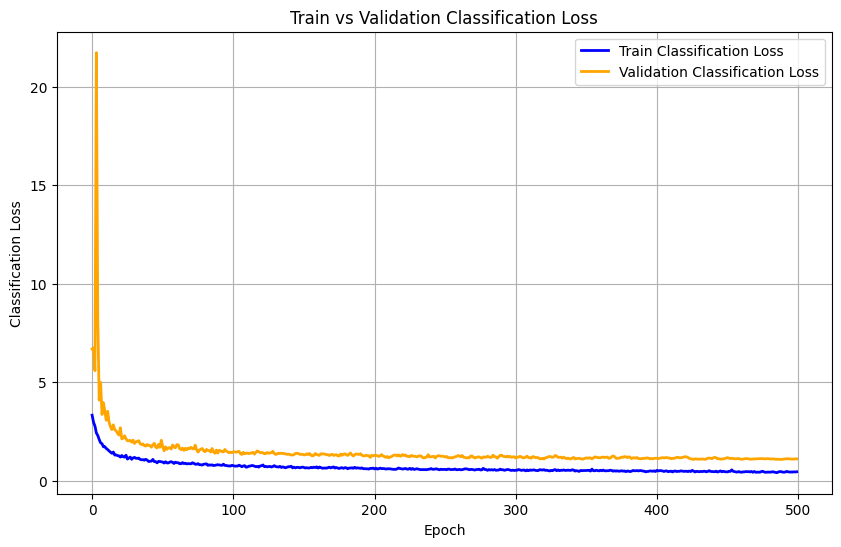

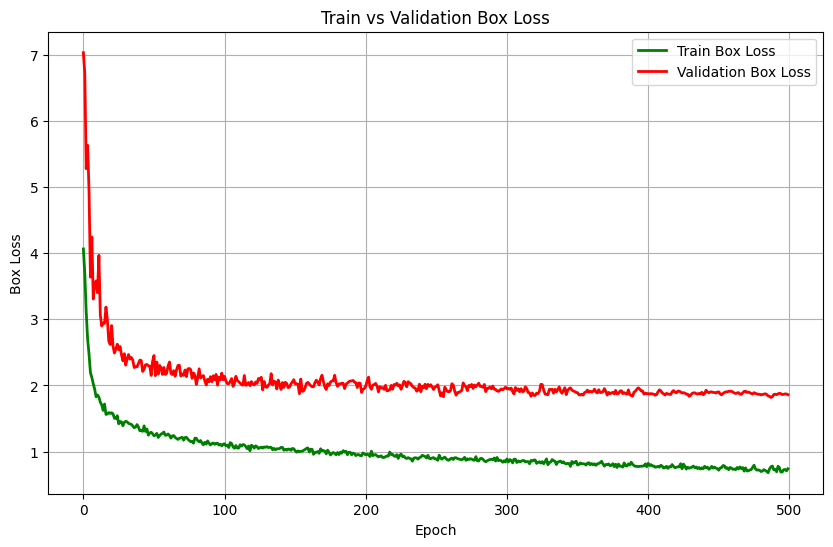

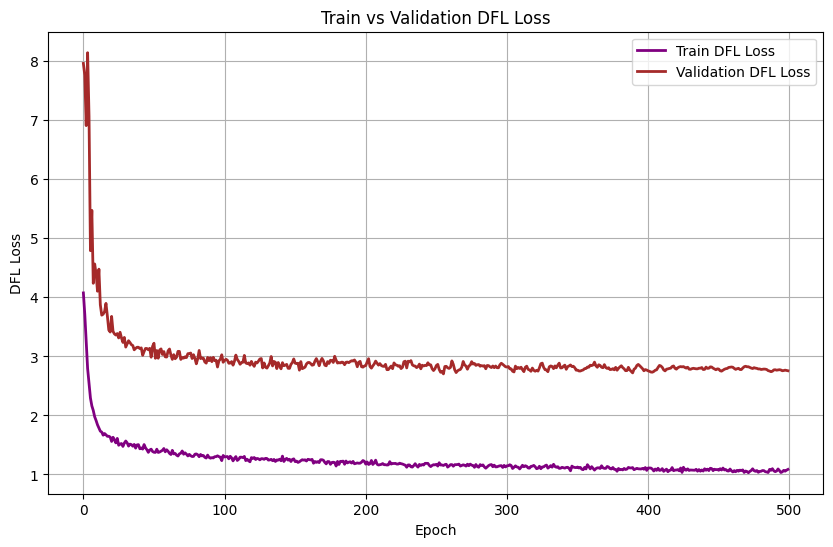

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/drive/MyDrive/RGELAN/runs/train/fold116/results.csv' # -----> Change this depending on the folder where results are saved <-----
data = pd.read_csv(file_path)

# Plotting train/cls_loss and val/cls_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/cls_loss'], label='Train Classification Loss', color='blue', linewidth=2)
plt.plot(data['        val/cls_loss'], label='Validation Classification Loss', color='orange', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/box_loss and val/box_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/box_loss'], label='Train Box Loss', color='green', linewidth=2)
plt.plot(data['        val/box_loss'], label='Validation Box Loss', color='red', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/dfl_loss and val/dfl_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/dfl_loss'], label='Train DFL Loss', color='purple', linewidth=2)
plt.plot(data['        val/dfl_loss'], label='Validation DFL Loss', color='brown', linewidth=2)

# Labels and Title
plt.title('Train vs Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fold 2
fold_idx = 1
val_folder = fold_directories[fold_idx]
print(f"Training on fold {fold_idx + 1}...")

# Define training folders (all other folds)
train_folders = fold_directories[:fold_idx] + fold_directories[fold_idx + 1:]

# Create training folders for the current fold
train_fold = create_train_folders(train_folders, fold_idx + 1)
print(train_fold)

# Train YOLOv9 on the current fold
train_yolov9(train_fold, val_folder, fold_idx + 1)

Training on fold 2...
Train2 - Images: 561, Labels: 561
/content/drive/MyDrive/Folds/train2
/content/drive/MyDrive/Folds/fold_2
2024-09-19 14:35:03.401861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 14:35:03.421964: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 14:35:03.428493: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 14:35:03.444629: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in

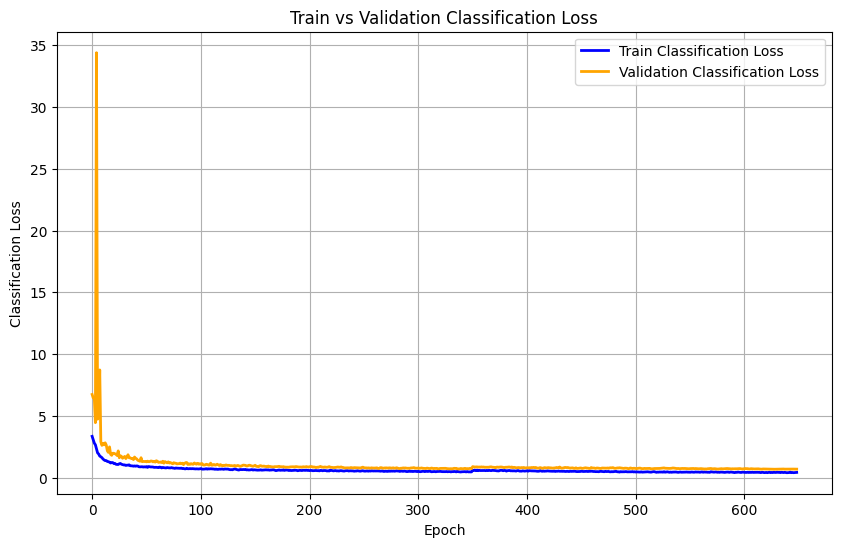

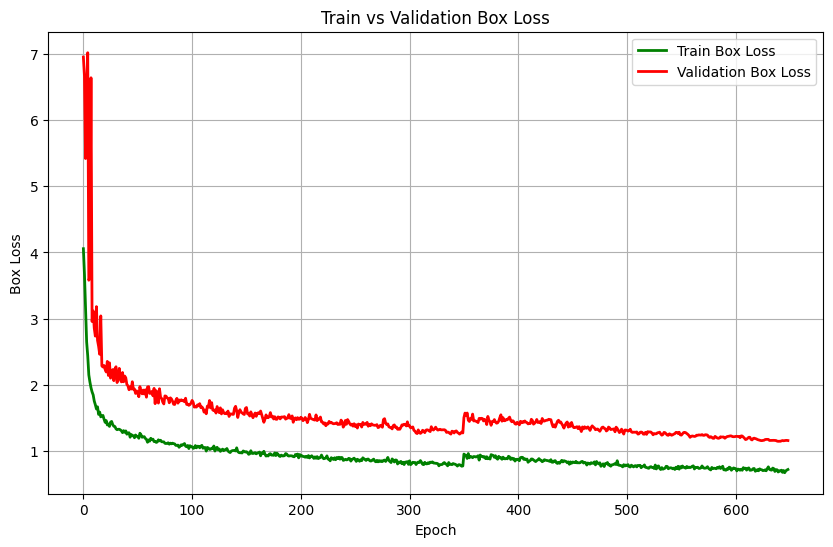

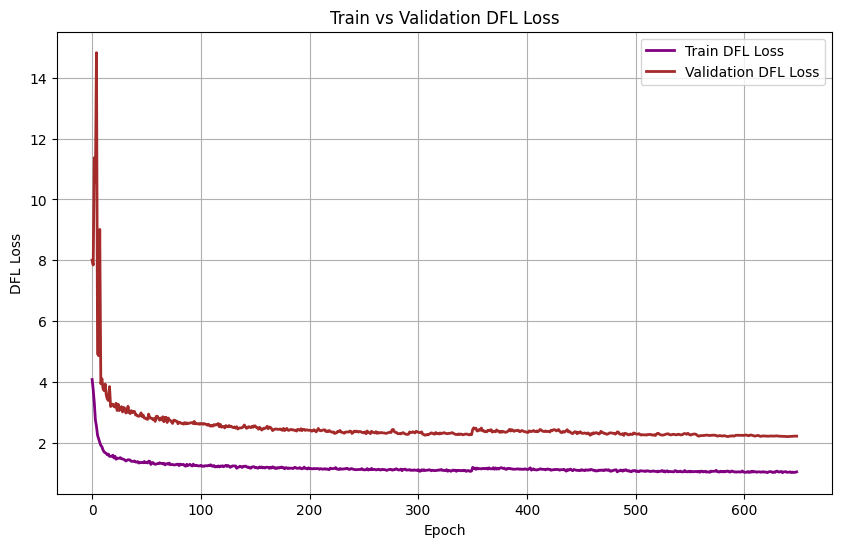

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/drive/MyDrive/RGELAN/runs/train/fold24/results.csv' # -----> Change this depending on the folder where results are saved <-----
data = pd.read_csv(file_path)

# Plotting train/cls_loss and val/cls_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/cls_loss'], label='Train Classification Loss', color='blue', linewidth=2)
plt.plot(data['        val/cls_loss'], label='Validation Classification Loss', color='orange', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/box_loss and val/box_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/box_loss'], label='Train Box Loss', color='green', linewidth=2)
plt.plot(data['        val/box_loss'], label='Validation Box Loss', color='red', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/dfl_loss and val/dfl_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/dfl_loss'], label='Train DFL Loss', color='purple', linewidth=2)
plt.plot(data['        val/dfl_loss'], label='Validation DFL Loss', color='brown', linewidth=2)

# Labels and Title
plt.title('Train vs Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fold 3
fold_idx = 2
val_folder = fold_directories[fold_idx]
print(f"Training on fold {fold_idx + 1}...")

# Define training folders (all other folds)
train_folders = fold_directories[:fold_idx] + fold_directories[fold_idx + 1:]

# Create training folders for the current fold
train_fold = create_train_folders(train_folders, fold_idx + 1)
print(train_fold)

# Train YOLOv9 on the current fold
train_yolov9(train_fold, val_folder, fold_idx + 1)

Training on fold 3...
Train3 - Images: 561, Labels: 561
/content/drive/MyDrive/Folds/train3
/content/drive/MyDrive/Folds/fold_3
2024-09-21 12:21:01.486727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 12:21:01.506552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 12:21:01.512915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 12:21:01.527229: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F

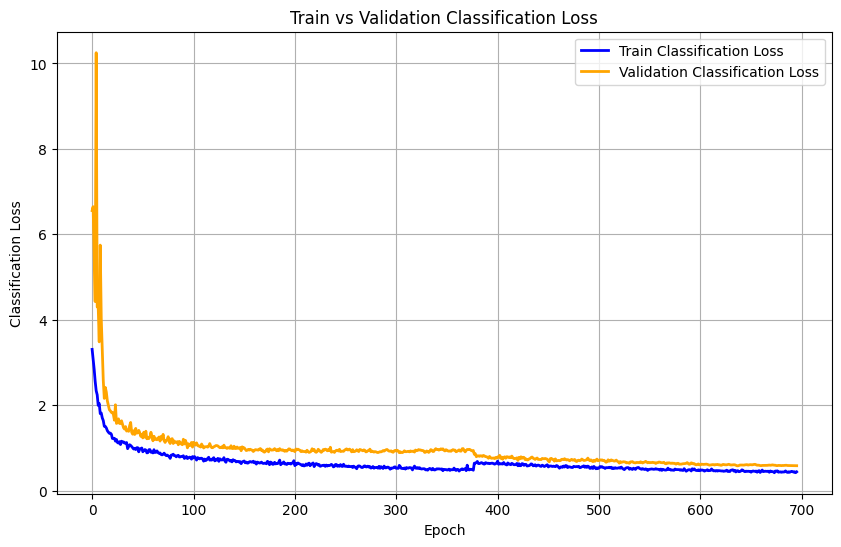

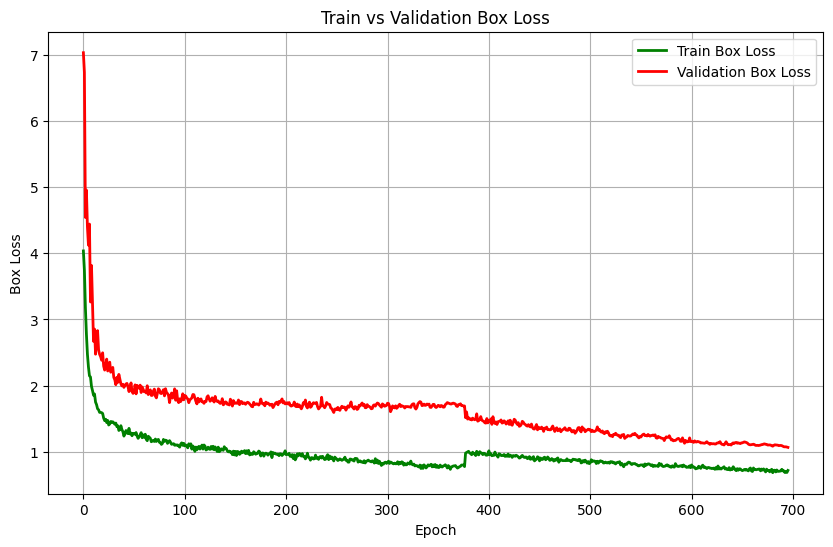

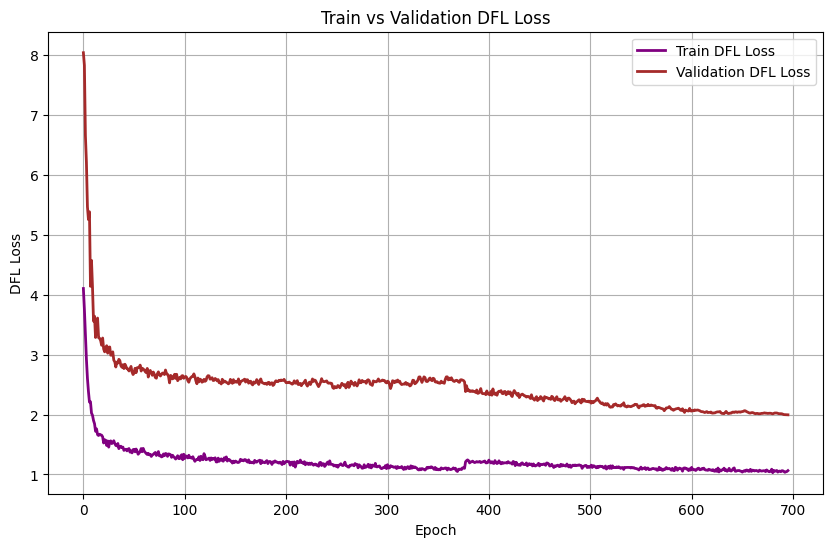

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/drive/MyDrive/RGELAN/runs/train/fold32/results.csv' # -----> Change this depending on the folder where results are saved <-----
data = pd.read_csv(file_path)

# Plotting train/cls_loss and val/cls_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/cls_loss'], label='Train Classification Loss', color='blue', linewidth=2)
plt.plot(data['        val/cls_loss'], label='Validation Classification Loss', color='orange', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/box_loss and val/box_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/box_loss'], label='Train Box Loss', color='green', linewidth=2)
plt.plot(data['        val/box_loss'], label='Validation Box Loss', color='red', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/dfl_loss and val/dfl_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/dfl_loss'], label='Train DFL Loss', color='purple', linewidth=2)
plt.plot(data['        val/dfl_loss'], label='Validation DFL Loss', color='brown', linewidth=2)

# Labels and Title
plt.title('Train vs Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fold 4
fold_idx = 3
val_folder = fold_directories[fold_idx]
print(f"Training on fold {fold_idx + 1}...")

# Define training folders (all other folds)
train_folders = fold_directories[:fold_idx] + fold_directories[fold_idx + 1:]

# Create training folders for the current fold
train_fold = create_train_folders(train_folders, fold_idx + 1)
print(train_fold)

# Train YOLOv9 on the current fold
train_yolov9(train_fold, val_folder, fold_idx + 1)

Training on fold 4...
Train4 - Images: 567, Labels: 561
/content/drive/MyDrive/Folds/train4
/content/drive/MyDrive/Folds/fold_4
2024-09-22 10:15:32.308477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 10:15:32.328414: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 10:15:32.334367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 10:15:32.348382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F

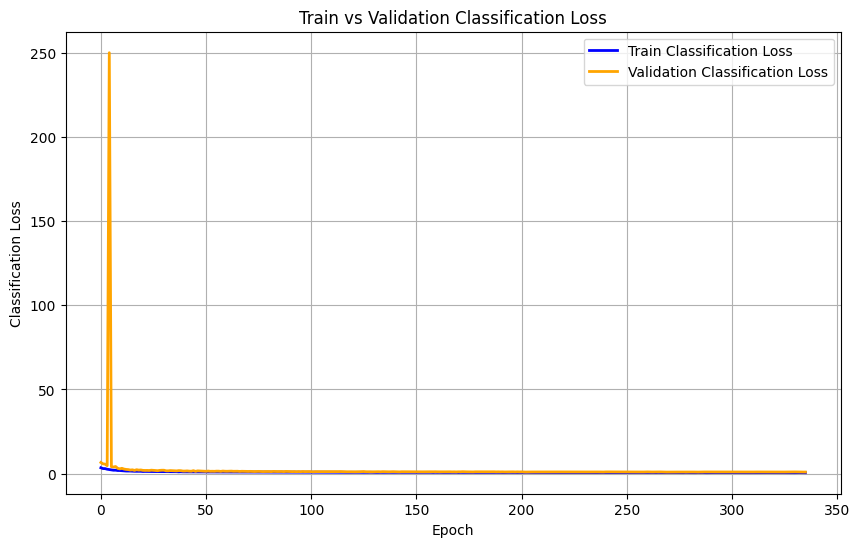

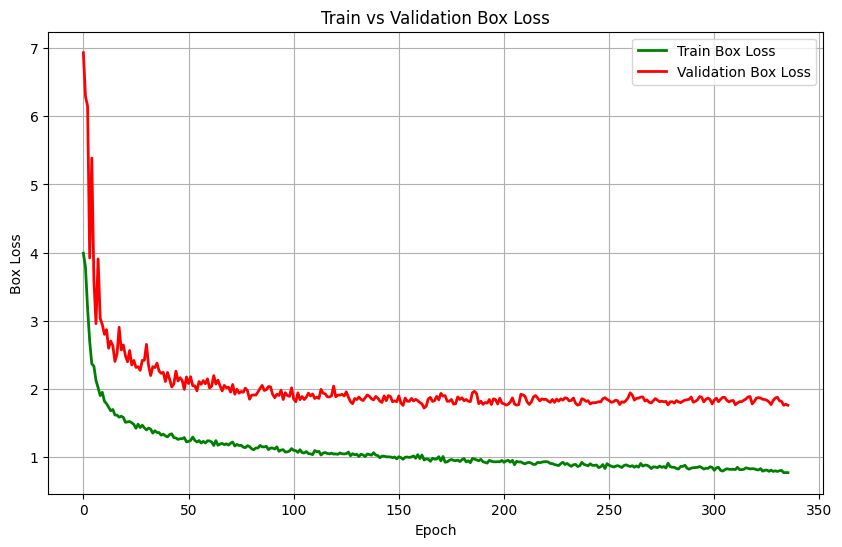

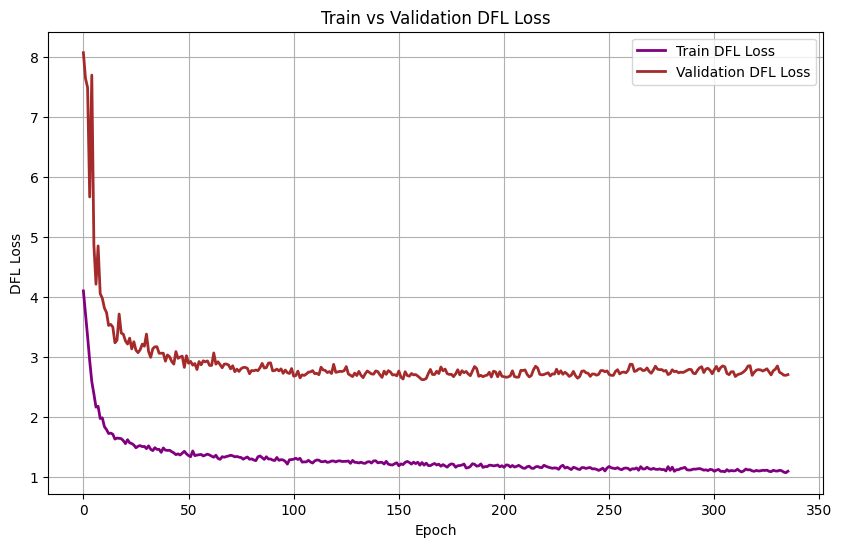

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/drive/MyDrive/RGELAN/runs/train/fold4/results.csv' # -----> Change this depending on the folder where results are saved <-----
data = pd.read_csv(file_path)

# Plotting train/cls_loss and val/cls_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/cls_loss'], label='Train Classification Loss', color='blue', linewidth=2)
plt.plot(data['        val/cls_loss'], label='Validation Classification Loss', color='orange', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/box_loss and val/box_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/box_loss'], label='Train Box Loss', color='green', linewidth=2)
plt.plot(data['        val/box_loss'], label='Validation Box Loss', color='red', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/dfl_loss and val/dfl_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/dfl_loss'], label='Train DFL Loss', color='purple', linewidth=2)
plt.plot(data['        val/dfl_loss'], label='Validation DFL Loss', color='brown', linewidth=2)

# Labels and Title
plt.title('Train vs Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fold 5
fold_idx = 4
val_folder = fold_directories[fold_idx]
print(f"Training on fold {fold_idx + 1}...")

# Define training folders (all other folds)
train_folders = fold_directories[:fold_idx] + fold_directories[fold_idx + 1:]

# Create training folders for the current fold
train_fold = create_train_folders(train_folders, fold_idx + 1)
print(train_fold)

# Train YOLOv9 on the current fold
train_yolov9(train_fold, val_folder, fold_idx + 1)

Training on fold 5...
Train5 - Images: 561, Labels: 561
/content/drive/MyDrive/Folds/train5
/content/drive/MyDrive/Folds/fold_5
2024-09-22 14:34:39.145172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 14:34:39.178809: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 14:34:39.189274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 14:34:39.212503: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F

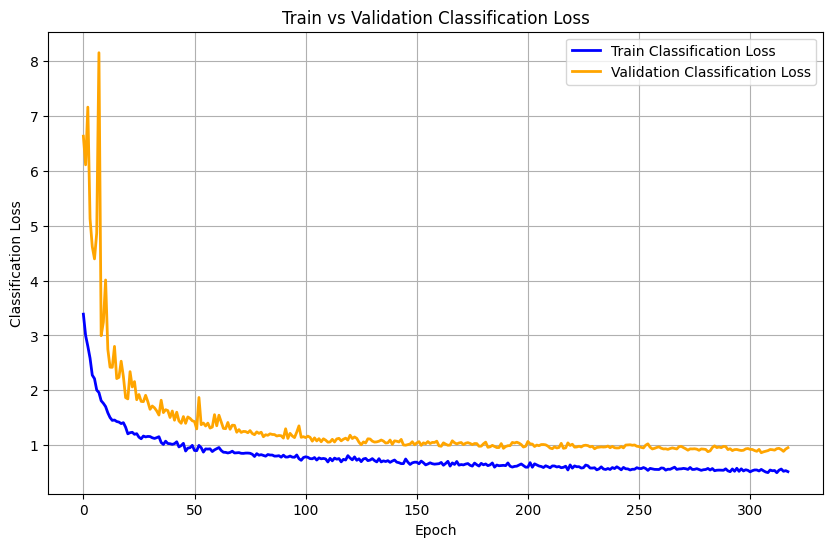

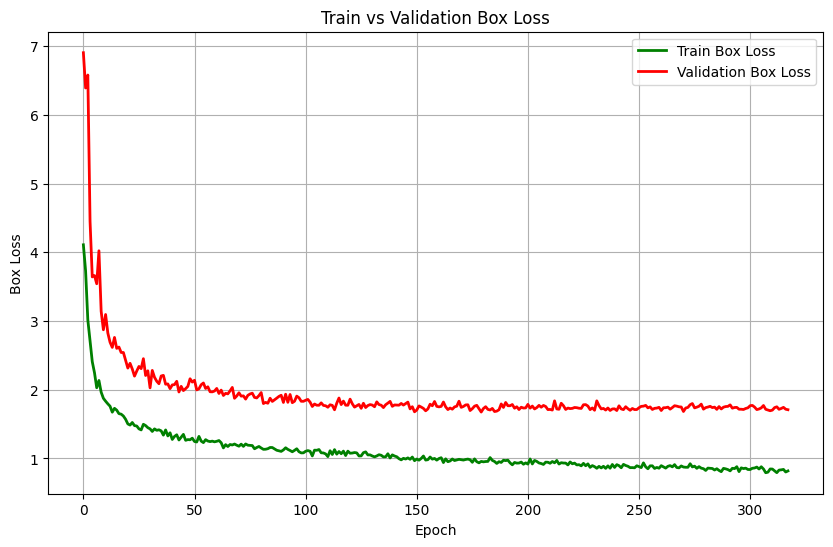

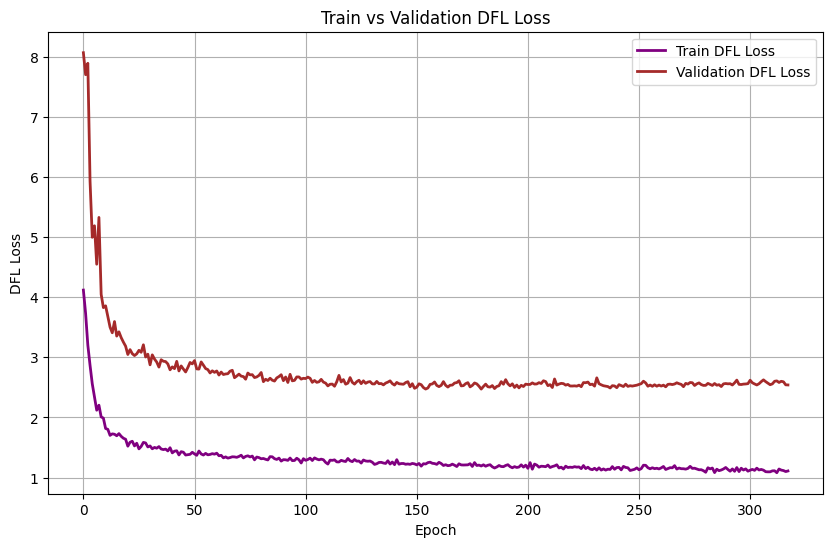

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/drive/MyDrive/RGELAN/runs/train/fold59/results.csv' # -----> Change this depending on the folder where results are saved <-----
data = pd.read_csv(file_path)

# Plotting train/cls_loss and val/cls_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/cls_loss'], label='Train Classification Loss', color='blue', linewidth=2)
plt.plot(data['        val/cls_loss'], label='Validation Classification Loss', color='orange', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/box_loss and val/box_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/box_loss'], label='Train Box Loss', color='green', linewidth=2)
plt.plot(data['        val/box_loss'], label='Validation Box Loss', color='red', linewidth=2)

# Labels and Title
plt.title('Train vs Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train/dfl_loss and val/dfl_loss
plt.figure(figsize=(10, 6))
plt.plot(data['      train/dfl_loss'], label='Train DFL Loss', color='purple', linewidth=2)
plt.plot(data['        val/dfl_loss'], label='Validation DFL Loss', color='brown', linewidth=2)

# Labels and Title
plt.title('Train vs Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!python /content/drive/MyDrive/RGELAN/train.py \
--batch 8 --epochs 500 --img 640 --device 0 --min-items 0 --close-mosaic 15 --save-period 20 \
--data /content/drive/MyDrive/RGELAN/data/coco.yaml \
--cfg /content/drive/MyDrive/RGELAN/models/detect/ne-rcs-gelan-c-v39.yaml \
--hyp /content/drive/MyDrive/RGELAN/data/hyps/hyp.scratch-high.yaml

#anchors =6

SyntaxError: invalid syntax (<ipython-input-49-54c07d1e3e7a>, line 2)

**YOLOV9 Model based on https://github.com/RuiyangJu/YOLOv9-Fracture-Detection**

In [ ]:
!pip install ultralytics

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/'

In [ ]:
import os

# Path to your label directory
label_dir = '/content/drive/MyDrive/brain/TRAIN/labels/'

# List all label files
label_files = os.listdir(label_dir)

# Find empty label files
background_images = []
for label_file in label_files:
    label_path = os.path.join(label_dir, label_file)
    # Check if the label file is empty (background)
    if os.stat(label_path).st_size == 0:
        # Append the corresponding image file (removing the .txt extension)
        image_name = label_file.replace('.txt', '.jpg')  # or the image extension you're using
        background_images.append(image_name)

# Print or save the background images
print("Background images:", background_images)


Background images: ['y245.jpg', 'y257.jpg', 'y457.jpg']


In [ ]:
# Load a model
model = YOLO("yolov9c.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "coco.yaml"), epochs=500)  # train the model

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/drive/MyDrive/coco.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning /content/drive/MyDrive/brain/TRAIN/labels... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:06<00:00, 82.61it/s] 


train: New cache created: /content/drive/MyDrive/brain/TRAIN/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/brain/VAL/labels... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:02<00:00, 76.03it/s] 


val: New cache created: /content/drive/MyDrive/brain/VAL/labels.cache
Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 160 weight(decay=0.0), 167 weight(decay=0.0005), 166 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      11.5G      1.379       2.99      1.651          6        640: 100%|██████████| 32/32 [00:26<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


                   all        201        240    0.00144     0.0875   0.000681   0.000228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      11.6G      1.442      2.146       1.67         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        201        240     0.0016      0.388    0.00133   0.000321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      11.6G      1.506      1.959      1.694         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        201        240     0.0016      0.388    0.00133   0.000321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      11.6G      1.467      1.771      1.675          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        201        240     0.0016      0.388    0.00133   0.000321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      11.6G      1.372      1.501      1.602          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        201        240     0.0016      0.388    0.00133   0.000321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      11.6G      1.346      1.377      1.589         16        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240     0.0136      0.667     0.0126    0.00583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      11.6G       1.37      1.428      1.581          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        201        240      0.504      0.346      0.362      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      11.6G      1.245      1.244      1.508          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        201        240      0.562      0.637      0.561      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      11.6G      1.307      1.241      1.547          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.565      0.467       0.47      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      11.6G      1.215      1.093      1.472         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.615      0.487      0.532      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      11.6G      1.224      1.112      1.487         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.568      0.389      0.415      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      11.6G      1.155      1.027       1.44          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.753      0.625      0.705      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      11.6G      1.182      1.056      1.475          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        201        240      0.726      0.754      0.787      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      11.6G      1.179      1.026      1.419         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


                   all        201        240      0.784      0.667      0.733      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      11.6G      1.163      1.003      1.448          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.848      0.719      0.815      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      11.6G      1.081     0.9531      1.348         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.852       0.77      0.852      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      11.6G        1.2      1.028      1.475          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.801      0.672      0.762      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      11.6G      1.125     0.9546      1.388          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.756      0.812      0.833      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      11.6G      1.085     0.9258      1.384          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.783        0.7      0.797      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      11.6G      1.123     0.9459      1.409          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.875      0.783      0.864      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      11.6G      1.115       0.91      1.401         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.887      0.717      0.817      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      11.6G      1.056     0.9001      1.371         12        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        201        240      0.751      0.716      0.782      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      11.6G      1.034     0.8626      1.343         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.783      0.812      0.846      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      11.6G      1.067      0.865       1.38          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.874      0.696      0.811      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      11.6G       1.09      0.875      1.389          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.927      0.793      0.892      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      11.6G      1.071     0.8508      1.375          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.882      0.804      0.882      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      11.6G      1.046     0.8524      1.349          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.874      0.796      0.875      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      11.6G      1.058      0.831      1.352          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.895      0.817      0.888      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      11.6G      1.067     0.8363      1.349          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.795      0.842      0.866      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      11.6G      1.002     0.8133      1.309         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.807      0.825      0.875      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      11.6G      1.019     0.7748      1.318          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.899       0.75      0.848      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      11.6G     0.9966     0.7896      1.288          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.919      0.805      0.897      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      11.6G      1.025     0.8204      1.326         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.868      0.737      0.849      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      11.6G      1.013     0.7851      1.321         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.932      0.792      0.888       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      11.6G      1.043     0.8078      1.361          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.827      0.778      0.849      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      11.6G      1.033     0.7937      1.337          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.817      0.765      0.822      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      11.6G     0.9974     0.8102      1.316          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.861      0.723       0.84      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      11.6G     0.9906     0.7593      1.304          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.917      0.787      0.897      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      11.6G      1.004     0.7952      1.315          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.953      0.836      0.916      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      11.6G     0.9788     0.7523      1.296          3        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.932      0.853      0.921      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      11.6G     0.9461     0.7285      1.253          3        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.951      0.813      0.906      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      11.6G     0.9498     0.7168      1.255         10        640: 100%|██████████| 32/32 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.917       0.83      0.905      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      11.6G     0.9617     0.7289      1.278          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.917      0.829      0.888      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      11.6G     0.9672      0.724      1.308         13        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240      0.851      0.817      0.889      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      11.6G     0.9346     0.7295      1.263          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        201        240      0.869      0.722      0.822      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      11.6G      0.967     0.7466      1.274         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240       0.91      0.797      0.884      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      11.6G     0.9538     0.7028       1.26          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.881      0.709      0.825      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      11.6G     0.9631     0.7394      1.288          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.881      0.838      0.915      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      11.6G     0.9741     0.7225      1.286          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.926      0.778      0.872      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      11.6G     0.9768     0.7524      1.278          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.841      0.858      0.913       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      11.6G     0.9209     0.6803      1.241          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.924      0.816      0.909      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      11.6G     0.9127     0.6844      1.233          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.848      0.779      0.874      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      11.6G     0.9731     0.7435      1.295          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        201        240      0.861      0.776      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      11.6G     0.9542      0.706      1.267          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        201        240      0.944       0.84      0.927      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      11.6G     0.9626     0.7032      1.268          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.878      0.837      0.915      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      11.6G     0.9129     0.6451      1.232          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.935      0.839      0.932      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      11.6G     0.9057     0.6534      1.221         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240       0.88      0.854      0.929      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      11.6G     0.8989     0.6669       1.23          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.887      0.858      0.913      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      11.6G     0.9253     0.6496      1.253          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.937      0.863      0.935      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      11.6G     0.9169     0.6796      1.261         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.876       0.85       0.91      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      11.6G     0.8775     0.6437      1.224          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.941      0.864      0.934      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      11.6G     0.9177     0.6612       1.25          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]

                   all        201        240      0.874      0.892      0.937       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      11.6G     0.9087     0.6664      1.258          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.892       0.85      0.923      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      11.6G     0.9057     0.6513      1.237          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        201        240      0.914      0.845      0.926       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      11.6G     0.9255     0.6557      1.258         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.905      0.829      0.909      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      11.6G     0.9129     0.6203      1.232          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240        0.9      0.825      0.895      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      11.6G     0.9032     0.6475      1.226          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.911      0.857      0.922      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      11.6G     0.9015     0.6481      1.228          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240       0.92      0.838      0.915      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      11.6G     0.8975     0.6411      1.228          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.944      0.836      0.922      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      11.6G     0.8685     0.6363      1.214          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        201        240      0.896      0.783      0.889      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      11.6G     0.8685     0.6324      1.214          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]


                   all        201        240      0.914      0.867      0.942       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      11.6G     0.8956     0.6181       1.22          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240      0.828      0.812      0.879      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      11.6G     0.8994     0.6206       1.24          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.957      0.841      0.933      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      11.6G     0.9046     0.6412      1.221          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.887      0.853      0.921      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      11.6G     0.8484     0.5988       1.18         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        201        240      0.918      0.821      0.926      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      11.6G     0.8905     0.6086       1.21          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.798      0.867      0.897      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      11.6G     0.8699      0.626      1.221         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.904      0.871      0.931      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      11.6G     0.9108     0.6413      1.225          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.921      0.846      0.934      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      11.6G     0.8823     0.6523      1.196          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.943      0.829      0.935      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      11.6G     0.9077     0.6585      1.262          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.863      0.808       0.89      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      11.6G     0.8773     0.6271      1.218         12        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.897      0.869      0.921      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      11.6G     0.8524     0.5826      1.202         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.956      0.792      0.896      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      11.6G     0.9017     0.6319      1.242          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.842      0.875      0.926      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      11.6G     0.8795     0.6283        1.2         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240       0.86      0.821      0.905      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      11.6G     0.8692     0.6035      1.203          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.891      0.854       0.91      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      11.6G     0.9066      0.631      1.225          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        201        240      0.913      0.877      0.931      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      11.6G     0.8781     0.6041      1.196          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.947      0.871       0.94      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      11.6G     0.8494     0.5969      1.187          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.957      0.879      0.947      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      11.6G     0.8575     0.5843      1.194         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.902      0.904      0.946      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      11.6G     0.8691     0.6139      1.226          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240       0.93       0.85      0.918      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      11.6G     0.8717     0.5937      1.203          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.909      0.833      0.925      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      11.6G     0.8919     0.6138      1.225          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240       0.91      0.839       0.92      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      11.6G     0.8301     0.5708      1.173          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.916      0.846      0.935      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      11.6G     0.8377     0.6006       1.19          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.891      0.853      0.928      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      11.6G     0.8709     0.5885      1.202          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        201        240      0.945      0.867      0.943      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      11.6G     0.8266     0.5608      1.181          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.947      0.846      0.933      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      11.6G     0.8618     0.5811      1.195          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.924      0.883      0.943      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      11.6G     0.8491      0.605       1.18          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.912      0.883      0.938      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      11.6G     0.8418     0.5842      1.194          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        201        240      0.917      0.877      0.941      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      11.6G     0.8095     0.5625      1.174         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.937      0.875      0.946      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      11.6G     0.8355     0.5737      1.191          3        640: 100%|██████████| 32/32 [00:24<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]

                   all        201        240      0.901      0.907      0.949      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      11.6G     0.8383     0.5734      1.208          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        201        240      0.905      0.875      0.935      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      11.6G      0.846     0.5765      1.182          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.892      0.879      0.933      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      11.6G     0.8268     0.5635      1.181          3        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.911      0.853      0.917      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      11.6G     0.8214     0.5766      1.171          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240      0.904      0.871      0.938      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      11.6G     0.8154     0.5643      1.176          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240       0.94      0.842      0.927      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      11.6G     0.8387     0.5811        1.2          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.911      0.854      0.932      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      11.6G     0.8379     0.5522      1.188          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.904      0.901      0.947       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      11.6G     0.8121     0.5636      1.165         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.933      0.875       0.95      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      11.6G     0.7923     0.5433      1.145          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.941      0.883       0.95      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      11.6G     0.8081     0.5508      1.148          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240      0.939      0.898      0.954      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      11.6G     0.8065      0.538      1.171          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.901      0.872      0.917      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      11.6G     0.8088     0.5246      1.153          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.877      0.854      0.911      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      11.6G     0.8152     0.5637      1.185          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        201        240      0.925      0.912      0.954      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      11.6G     0.7762     0.5297      1.144          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.962      0.863      0.943      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      11.6G     0.8064     0.5502      1.157          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        201        240      0.921      0.875      0.941      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      11.6G     0.7844     0.5294      1.158          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.927      0.883      0.931      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      11.6G     0.7965     0.5202       1.16          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        201        240      0.901       0.85      0.925      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      11.6G     0.7923     0.5317      1.155         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        201        240       0.93        0.9      0.956      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      11.6G      0.764     0.5092      1.139          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.918      0.885      0.933      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      11.6G      0.806     0.5411      1.174          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240       0.93      0.838       0.93      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      11.6G      0.774     0.5316      1.148          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.907      0.856      0.932      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      11.6G     0.8017     0.5317      1.155         14        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.933      0.872      0.939      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      11.6G     0.7889      0.528      1.161         13        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.922      0.858      0.929      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      11.6G     0.8185      0.558      1.168          5        640: 100%|██████████| 32/32 [00:26<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.922      0.892      0.943      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      11.6G      0.808     0.5435      1.164          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.941      0.883       0.95        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      11.6G     0.7975     0.5437      1.143          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.947      0.829       0.92      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      11.6G      0.786     0.5334      1.142          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.936      0.852      0.932      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      11.6G     0.8239      0.566      1.179          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240       0.94      0.879      0.933      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      11.6G     0.7822     0.5193      1.163          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.951      0.829      0.924      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      11.6G      0.773     0.5276      1.129         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.902      0.881      0.934      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      11.6G     0.7917     0.5359      1.146          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240      0.925      0.875      0.934      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      11.6G     0.7708     0.5379      1.131          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.908      0.902       0.94      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      11.6G     0.7749     0.5081      1.142          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        201        240      0.927      0.875      0.933      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      11.6G      0.764     0.5369       1.13         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.929      0.921      0.949       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      11.6G     0.7643     0.5227      1.129          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.959        0.9       0.95      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      11.6G     0.8142     0.5626       1.18          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.923      0.893      0.939       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      11.6G     0.7197     0.4922       1.11          3        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.946      0.868      0.932      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      11.6G     0.7768     0.5084      1.135          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.881      0.898      0.928       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      11.6G     0.7652     0.5132      1.127          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.962      0.854      0.939      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      11.6G     0.7717     0.4928      1.132         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240       0.93      0.887      0.946      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      11.6G     0.7767     0.5076      1.129         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.892      0.928      0.953      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      11.6G     0.7613     0.5074      1.124         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.938      0.929      0.964      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      11.6G     0.7348     0.5064      1.114          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.942      0.887       0.95      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      11.6G     0.7934     0.5345      1.142          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        201        240      0.929      0.896      0.951      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      11.6G     0.7489     0.4983       1.12          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240       0.96      0.898      0.946      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      11.6G     0.7534       0.48      1.111          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.947      0.885      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      11.6G     0.7672     0.5141      1.131         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240       0.92      0.864      0.922      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      11.6G      0.732     0.4903       1.12          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240       0.94        0.9      0.943      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      11.6G     0.7422     0.5009      1.112          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240       0.95      0.871       0.95      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      11.6G     0.7318     0.4946      1.104          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.911      0.899      0.943       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      11.6G     0.7445     0.4947      1.123         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240       0.92      0.908      0.938      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      11.6G     0.7262     0.4945      1.116          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.916      0.879      0.929      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      11.6G     0.7482     0.5003      1.133         12        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.949      0.892       0.96      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      11.6G     0.7499      0.478      1.126          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.931      0.933       0.96      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      11.6G     0.7347     0.4827      1.114          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.968      0.869      0.945      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      11.6G     0.7466     0.4746      1.131          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.957      0.863      0.937       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      11.6G     0.7413     0.4717      1.128         12        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.962      0.912      0.947      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      11.6G     0.7622     0.4894      1.148          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.946      0.879      0.946      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      11.6G     0.7272     0.4785      1.106          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.913      0.876      0.933      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      11.6G     0.7545      0.483      1.127          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.942      0.875      0.928      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      11.6G     0.7637     0.5123      1.146          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240       0.96      0.895      0.939      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      11.6G      0.752      0.491      1.107         13        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.933      0.904      0.946      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      11.6G     0.7753     0.5123      1.138          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240      0.929      0.926      0.947      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      11.6G     0.7157     0.4754      1.087          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.908      0.868      0.924      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      11.6G     0.6961     0.4465      1.089          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        201        240      0.963      0.796      0.913      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      11.6G     0.7244     0.4715      1.102          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


                   all        201        240       0.93      0.858      0.943       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      11.6G     0.7135     0.4822      1.093          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.951      0.893       0.95      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      11.6G     0.7336      0.477      1.114          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.947      0.901      0.952      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      11.6G     0.7562     0.5018      1.119          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.936      0.913      0.948      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      11.6G     0.7644     0.4971      1.132          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.945      0.867      0.936      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      11.6G     0.7254     0.4838      1.115          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.957      0.871      0.952      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      11.6G     0.7157     0.4672      1.104          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.939      0.892      0.955      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      11.6G     0.7164     0.4786        1.1         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        201        240      0.955      0.912      0.956      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      11.6G     0.7039     0.4704      1.104          3        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.874       0.85      0.895      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      11.6G     0.7061     0.4656      1.085         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240       0.93      0.883      0.952        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      11.6G     0.7459     0.4786      1.135          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240      0.977      0.884      0.952      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      11.6G      0.713     0.4545      1.085          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        201        240      0.933      0.908      0.947      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      11.6G     0.7266     0.4839      1.113          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.952      0.902       0.95      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      11.6G     0.7226     0.4827      1.096          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240       0.94        0.9      0.939      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      11.6G     0.7488     0.4847      1.115          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240       0.93      0.887      0.931      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      11.6G     0.7235     0.4785      1.102          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        201        240      0.976      0.863      0.946      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      11.6G     0.7146     0.4757      1.106          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        201        240      0.956      0.879      0.944      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      11.6G     0.7004     0.4594      1.097          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        201        240      0.947      0.887      0.953      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      11.6G     0.6983     0.4555      1.086          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240       0.95      0.879      0.943      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      11.6G     0.7029     0.4587      1.112          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.942      0.904      0.943      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      11.6G     0.6854     0.4366      1.098          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.943      0.899      0.942      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      11.6G     0.7207      0.457      1.096          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.946      0.883      0.946      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      11.6G     0.7318     0.4656      1.115          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.936      0.904      0.949      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      11.6G     0.7008     0.4815      1.099         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        201        240      0.956      0.912      0.951      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      11.6G     0.6821     0.4533      1.079         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.961      0.912      0.955      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      11.6G     0.7206     0.4577      1.114          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        201        240      0.952      0.904      0.962      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      11.6G     0.7023     0.4654      1.094          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.957      0.929      0.965      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      11.6G     0.6981     0.4494      1.089          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        201        240      0.922      0.921      0.957      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      11.6G     0.7109     0.4521      1.083          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.963      0.866      0.943      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      11.6G     0.7407     0.4627      1.114         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        201        240       0.97      0.879      0.941      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      11.6G     0.6786     0.4439      1.073         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        201        240      0.949      0.879      0.937       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      11.6G     0.7034     0.4487      1.091         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240      0.934      0.892      0.932      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      11.6G      0.705     0.4589      1.088         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.939      0.929      0.956      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      11.6G     0.6943     0.4433      1.075          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        201        240      0.956      0.909      0.951      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      11.6G     0.6627     0.4225      1.063         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        201        240      0.947      0.898      0.948      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      11.6G     0.6767     0.4314      1.077          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        201        240      0.959      0.876      0.939      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      11.6G     0.6897     0.4487      1.089          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.925      0.904      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      11.6G     0.6957     0.4447      1.074         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.951      0.912      0.955      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      11.6G     0.6782     0.4516       1.06         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.945      0.896      0.952      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      11.6G      0.686     0.4491      1.068         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        201        240      0.954      0.865      0.942      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      11.6G     0.6842     0.4352       1.06          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        201        240      0.964      0.925       0.96       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      11.6G     0.6606     0.4261      1.072          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.949      0.937      0.962      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      11.6G      0.675     0.4461      1.074         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        201        240      0.967      0.892      0.963      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      11.6G     0.6796     0.4428      1.084         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.953      0.892      0.944      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      11.6G     0.6744     0.4211      1.088          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        201        240      0.958      0.904      0.948      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      11.6G      0.692     0.4421      1.089          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.951       0.89      0.944        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      11.6G     0.6741     0.4294       1.08         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.911      0.933      0.949      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      11.6G     0.6904     0.4472      1.079         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.944      0.929       0.95       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      11.6G     0.6428     0.4389      1.059         13        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        201        240       0.94      0.921      0.942      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      11.6G     0.6903     0.4557      1.082          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        201        240      0.953      0.917      0.939      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      11.6G      0.637     0.4277      1.049          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240       0.96      0.898      0.951      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      11.6G     0.6888     0.4555      1.103          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.945      0.931      0.958      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      11.6G     0.6822     0.4132      1.079          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.949      0.887      0.954      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      11.6G     0.6611       0.42      1.068         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.972      0.882      0.946       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      11.6G     0.6503     0.4233       1.05          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.912      0.917      0.949      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      11.6G     0.6674     0.4372      1.061          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.947      0.896      0.946      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      11.6G     0.6447     0.4276      1.071         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.964      0.896      0.946      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      11.6G      0.652     0.4088      1.061          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


                   all        201        240      0.963      0.896      0.943      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      11.6G     0.6594     0.4276      1.065          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        201        240      0.964      0.882      0.938       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      11.6G     0.6742     0.4395      1.083         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.955      0.892      0.944      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      11.6G     0.6249      0.412      1.057          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        201        240      0.939      0.896      0.945       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      11.6G     0.6652     0.4088      1.056         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.951      0.893      0.954      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      11.6G     0.6382     0.4133      1.055         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.956      0.907      0.953      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      11.6G      0.668     0.4298      1.091          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.949      0.908      0.961      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      11.6G     0.6194     0.3925      1.038         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        201        240      0.955      0.908      0.949      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      11.6G     0.6606     0.4087      1.058          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        201        240       0.95      0.917      0.959      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      11.6G     0.6479     0.4145      1.038          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.933      0.925      0.957      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      11.6G     0.6467     0.4153      1.044          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.976      0.871      0.953      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      11.6G     0.6264     0.3985      1.056         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.956      0.914      0.954      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      11.6G     0.6533     0.4277      1.054         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.932      0.918      0.949      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      11.6G     0.6425     0.4139      1.049          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240      0.939      0.917       0.95      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      11.6G     0.6441     0.4175      1.056          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.981      0.864      0.937      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      11.6G     0.6527     0.4269      1.058          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.945      0.912      0.946      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      11.6G      0.656     0.4363      1.073         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.953      0.917      0.949      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      11.6G     0.6224     0.4154      1.044          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.948      0.887      0.939      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      11.6G     0.6174     0.3885      1.032         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.956      0.903      0.945      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      11.6G     0.6243      0.398      1.027          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.944      0.908      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      11.6G     0.6358     0.4003      1.054          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.967      0.896      0.954      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      11.6G     0.6352     0.4074       1.05          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.956      0.911      0.957      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      11.6G     0.6181     0.4322      1.047          3        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.948      0.909      0.949      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      11.6G     0.6177     0.4121      1.044          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240       0.93      0.925      0.949      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      11.6G     0.6532     0.4102       1.07          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.972      0.917      0.943      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      11.6G     0.6339     0.4006      1.061          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240      0.977      0.886      0.946      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      11.6G     0.6322     0.3891      1.062         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        201        240      0.964      0.883      0.942      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      11.6G     0.6169     0.3907      1.043          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        201        240      0.937      0.912      0.945      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      11.6G     0.6415     0.3971      1.044          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.962      0.917      0.945      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      11.6G     0.6324     0.3926      1.056          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.952      0.909      0.942      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      11.6G      0.609     0.3988      1.037          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240       0.95        0.9      0.942      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      11.6G     0.6188     0.4015      1.045         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.956      0.892      0.945      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      11.6G     0.6234        0.4      1.054          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.943      0.904      0.945      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      11.6G     0.6256     0.4035      1.047         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.955      0.908      0.948      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      11.6G     0.5942     0.3807       1.02          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.944      0.914      0.941      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      11.6G     0.6313     0.4086       1.05          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        201        240      0.952      0.907      0.946      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      11.6G     0.6359     0.3968      1.053          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        201        240      0.955      0.908      0.948      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      11.6G     0.6379     0.4026      1.052          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240       0.94      0.912      0.945      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      11.6G     0.6117     0.4051      1.028          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.958      0.925      0.949      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      11.6G     0.6136      0.407      1.035         14        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.963      0.908      0.949      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      11.6G     0.6073     0.3907      1.037         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.973      0.898      0.955      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      11.6G     0.6293     0.3961      1.061         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        201        240      0.962      0.925      0.958       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      11.6G     0.6101     0.3806      1.055         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.944      0.921      0.945      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      11.6G     0.6279     0.4041      1.061          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.951      0.893       0.94        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      11.6G     0.5944     0.3714      1.029          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.957      0.922      0.941      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      11.6G     0.6119     0.3657      1.039          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        240      0.964      0.917      0.949      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      11.6G     0.6211     0.3922      1.039         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.957      0.917       0.95      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      11.6G     0.6355     0.3923       1.05          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        201        240      0.965      0.925      0.945      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      11.6G     0.6106     0.3815      1.043         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        201        240      0.956      0.915      0.947      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      11.6G     0.6285     0.4067       1.05          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240      0.973      0.917      0.954      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      11.6G     0.5967     0.3853       1.04          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        201        240      0.963      0.933      0.951      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      11.6G     0.6198     0.4041       1.04          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.957      0.921      0.957      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      11.6G     0.5739     0.3649      1.023          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.956      0.938      0.962      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      11.6G     0.6374     0.4081       1.08          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.969      0.917      0.955      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      11.6G     0.5742     0.3564     0.9882          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240       0.97        0.9      0.953      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      11.6G     0.6008     0.3881      1.039         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        201        240      0.952      0.913      0.951      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      11.6G     0.5934     0.3758      1.028         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.949      0.923       0.95        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      11.6G     0.6027     0.3752      1.026          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.962      0.933       0.96      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      11.6G     0.5905     0.3894      1.019          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        201        240      0.972      0.908      0.958      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      11.6G     0.6074     0.3933      1.036          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.956      0.914      0.953      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      11.6G     0.5877     0.3694      1.025          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.961      0.916      0.957      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      11.6G     0.5877     0.3715      1.016          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240       0.96      0.925      0.953      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      11.6G     0.5896     0.3982      1.033          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.967      0.892      0.946      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      11.6G     0.5997     0.3895      1.043          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.963      0.883      0.946      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      11.6G     0.6009     0.3817      1.041         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.945        0.9      0.942      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      11.6G      0.593     0.3869       1.03          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.957      0.904      0.944      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      11.6G     0.5681     0.3649      1.021          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.964      0.905      0.945       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      11.6G      0.567     0.3816      1.019         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.956      0.908      0.952      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      11.6G     0.5967     0.3877      1.032         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.945      0.917      0.954       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      11.6G     0.5864     0.4005      1.026          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        201        240      0.952      0.921      0.954      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      11.6G      0.562      0.362      1.005          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.969      0.904      0.957      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      11.6G     0.5865     0.3695       1.01         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.969      0.909      0.952      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      11.6G     0.5905     0.3832      1.022         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.956      0.905      0.947      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      11.6G     0.5647      0.362     0.9994          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.964        0.9      0.946      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      11.6G     0.5471     0.3456     0.9987         12        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.952      0.916       0.95      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      11.6G     0.5763     0.3593      1.017          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.977      0.889       0.95      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      11.6G     0.5933      0.378      1.035          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.951      0.925      0.953      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      11.6G     0.5787     0.3677      1.012          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.965       0.92      0.952       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      11.6G     0.5695     0.3709       1.01          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.955      0.912      0.951       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      11.6G     0.5909     0.3635       1.03          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.956      0.912      0.948      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      11.6G     0.6084     0.3676      1.031          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.947        0.9      0.946      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      11.6G     0.5738     0.3542      1.023         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.963      0.896      0.947      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      11.6G     0.5738     0.3675     0.9978         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        201        240       0.96      0.908      0.951      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      11.6G     0.5824     0.3715      1.022          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        201        240      0.957       0.92      0.951       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      11.6G     0.5529     0.3483      0.992         12        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.965      0.908      0.953      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      11.6G     0.5506     0.3459     0.9954         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.937      0.923      0.955      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      11.6G     0.5508     0.3459     0.9993         12        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.948      0.914      0.957      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      11.6G     0.5862     0.3788      1.021          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        201        240      0.965      0.887      0.953       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      11.6G     0.5791     0.3821      1.027         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.972      0.883      0.947      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      11.6G      0.577      0.357      1.028          3        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.953        0.9      0.947      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      11.6G     0.5679      0.376      1.007          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.969      0.906      0.952      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      11.6G     0.5723     0.3696       1.02          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        201        240      0.973      0.925      0.953        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      11.6G     0.5587     0.3567      1.017         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        240      0.969      0.919      0.951      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      11.6G     0.5525     0.3565     0.9925         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.956      0.914      0.952      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      11.6G     0.5696     0.3504       1.01          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.968      0.896      0.951      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      11.6G     0.5659     0.3545      1.002         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        201        240      0.977      0.889      0.951        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      11.6G     0.5445     0.3619     0.9957         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240       0.96      0.925      0.956        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      11.6G     0.5473     0.3455      1.008          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.953      0.904      0.951      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      11.6G     0.5837     0.3602      1.014          7        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240       0.96      0.906      0.951      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      11.6G     0.5769     0.3587      1.004         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.946      0.921      0.959      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      11.6G     0.5752     0.3574      1.021          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.965      0.925       0.96      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      11.6G     0.5495     0.3447     0.9895         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.953      0.929      0.954      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      11.6G     0.5662       0.36      1.013         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        201        240       0.94      0.913      0.955      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      11.6G     0.5438     0.3528      1.005          3        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        201        240      0.956      0.917      0.953       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      11.6G     0.5687     0.3584       1.01          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        201        240      0.948      0.887      0.943      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      11.6G     0.5532     0.3559      1.004          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.946      0.921      0.951        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      11.6G     0.5558       0.35     0.9973          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.969      0.912      0.953      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      11.6G     0.5387     0.3325      1.009          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240       0.96      0.893      0.945      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      11.6G     0.5764     0.3665       1.02          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.968      0.908      0.954      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      11.6G     0.5247     0.3296     0.9886          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        201        240      0.969      0.912      0.957      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      11.6G     0.5514     0.3394      1.003          9        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.976      0.904      0.958      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      11.6G       0.51     0.3354     0.9779          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        201        240      0.969      0.924      0.953      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      11.7G     0.5436     0.3365     0.9947          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.949      0.923      0.948       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      11.6G     0.5306     0.3309     0.9866          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


                   all        201        240      0.965      0.883      0.944      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      11.6G     0.5546     0.3479     0.9998          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.948      0.912       0.94      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      11.6G     0.5552     0.3395      1.007          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.973      0.907      0.944      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      11.6G     0.5329     0.3453     0.9912          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.965      0.918      0.956      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      11.6G     0.5245      0.327     0.9797          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.972      0.917      0.957      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      11.6G      0.528     0.3336     0.9934          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


                   all        201        240      0.968      0.904      0.951      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      11.6G     0.5322     0.3324     0.9933         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240       0.95      0.925       0.95      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      11.6G     0.5246     0.3347     0.9925          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.956        0.9      0.944      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      11.6G     0.5347     0.3286     0.9802          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        201        240      0.963        0.9      0.945        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      11.6G     0.5288     0.3422      0.993          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.973      0.904      0.948      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      11.6G     0.5249     0.3248     0.9834          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.978      0.907      0.954      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      11.6G     0.5265     0.3415      1.004          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        201        240      0.965      0.914      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      11.6G     0.5307     0.3413     0.9923          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.969        0.9      0.947      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      11.6G      0.525     0.3365      1.006          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        201        240      0.949      0.908      0.948      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      11.6G     0.5279     0.3239     0.9902         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.945      0.926      0.952      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      11.6G     0.5288     0.3354      1.003          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.954      0.904      0.955      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      11.6G     0.5228     0.3291     0.9957          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.968      0.908      0.953      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      11.6G      0.534     0.3194      0.981         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.962      0.908      0.949      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      11.6G     0.5045     0.3229     0.9861         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        201        240      0.969      0.908      0.948      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      11.6G     0.5423     0.3347       1.02          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.965      0.911       0.95      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      11.6G     0.4875     0.3078     0.9514          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.938      0.925      0.953      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      11.6G     0.5047     0.3293     0.9715          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.959      0.908      0.953        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      11.6G     0.5129     0.3272      0.987          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        201        240      0.956      0.904      0.946      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      11.6G     0.5198     0.3385     0.9942          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240       0.96      0.917       0.95      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      11.6G     0.5268     0.3302      1.004         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        201        240       0.96      0.912       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      11.6G     0.5232      0.333      0.992         14        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.975        0.9      0.945        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      11.6G     0.5342     0.3328      1.001         14        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.959      0.908      0.951      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      11.6G     0.5188     0.3159     0.9878         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.962      0.892       0.95      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      11.6G      0.522     0.3297     0.9952          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        240      0.958      0.896      0.951      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      11.6G     0.5456     0.3488      1.008          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


                   all        201        240      0.959      0.921      0.952      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      11.6G     0.5313     0.3403     0.9976          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.957      0.929      0.951      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      11.7G     0.5264      0.335     0.9829          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        240      0.973      0.904      0.957      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      11.6G     0.5167     0.3264     0.9758          5        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        201        240      0.948      0.912      0.958      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      11.6G     0.5047     0.3284     0.9854          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        201        240      0.974       0.92       0.96      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      11.6G      0.516      0.328     0.9705         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        201        240      0.967      0.917      0.959      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      11.6G     0.4973     0.3252     0.9694         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


                   all        201        240      0.968        0.9      0.957      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      11.6G      0.497     0.3229     0.9621          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        201        240      0.982      0.891      0.952      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      11.6G     0.4923     0.3224     0.9792          4        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.971      0.917      0.949      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      11.6G     0.5255     0.3367     0.9964          7        640: 100%|██████████| 32/32 [00:26<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.977      0.917      0.947      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      11.6G     0.5013     0.3181     0.9849          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        201        240      0.977      0.902      0.946      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      11.6G     0.4975     0.3322     0.9765          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        201        240      0.968      0.917      0.951      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      11.6G     0.4942     0.3267     0.9706          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        201        240      0.954      0.917      0.949      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      11.6G     0.4915     0.3146     0.9671          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


                   all        201        240      0.957      0.922      0.951      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      11.6G     0.5072     0.3184     0.9786          4        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        201        240      0.978      0.908      0.952        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      11.6G     0.5136     0.3255      0.991          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240      0.977      0.904       0.94      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      11.6G     0.4863     0.3056     0.9707          6        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        201        240      0.965      0.917      0.949      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      11.6G     0.4944     0.3091     0.9681         10        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.965      0.907      0.944       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      11.6G     0.5202     0.3212     0.9864          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.969      0.908      0.944      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      11.6G     0.5054     0.3253     0.9807          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.967      0.908      0.944      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      11.6G     0.4991      0.308     0.9724          3        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        240      0.973      0.892      0.945      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      11.6G     0.4797     0.3086     0.9592         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        201        240      0.959      0.912      0.945      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      11.6G     0.4849     0.3046     0.9664          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        201        240      0.969      0.908      0.946      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      11.6G     0.4911     0.3231      0.969         10        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        201        240      0.973      0.911      0.949      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      11.6G     0.4967     0.3236     0.9745          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        201        240      0.965      0.909       0.95      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      11.6G     0.4928     0.3052     0.9571          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.969      0.911      0.948      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      11.6G     0.4955     0.3065     0.9566          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        201        240      0.976      0.896      0.948      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      11.6G     0.4935     0.3162     0.9691          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        201        240      0.968      0.904      0.944      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      11.6G     0.5276     0.3358      1.002          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        201        240      0.969      0.914      0.948      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      11.6G     0.4852     0.3158     0.9696          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        201        240      0.974      0.904      0.947      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      11.6G     0.4885     0.3078     0.9775          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        201        240      0.965      0.906      0.951      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      11.6G     0.4788     0.2958     0.9619          5        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.957      0.917      0.953      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      11.6G     0.5013     0.3192     0.9746         11        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        201        240      0.956      0.915      0.952      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      11.6G     0.5112     0.3233     0.9864          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        240      0.969      0.917      0.954      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      11.6G     0.5044     0.3131     0.9763         16        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        201        240      0.961      0.914      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      11.6G     0.5101     0.3242     0.9873         13        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        201        240      0.964      0.908      0.954      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      11.6G     0.4797     0.3065     0.9606          9        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        201        240      0.962      0.917       0.95      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      11.6G     0.4814     0.2929     0.9643          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        201        240      0.964      0.902      0.947      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      11.6G     0.4868     0.3067     0.9761          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        201        240      0.964      0.904      0.948      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      11.6G     0.4731     0.3081     0.9744          6        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        201        240      0.945       0.93       0.95      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      11.6G     0.4624     0.2905     0.9492         12        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        201        240      0.965      0.923      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      11.6G     0.4585     0.2954     0.9505          7        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        201        240       0.96      0.912      0.954      0.714


EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 307, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

407 epochs completed in 4.042 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 43.3MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 43.3MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 402 layers, 21,146,195 parameters, 0 gradients, 82.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


                   all        201        240      0.957      0.921      0.951       0.72
Speed: 0.4ms preprocess, 18.6ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
!python /content/drive/MyDrive/RCS-YOLO/train.py \
--epochs 150 --workers 8 --device 0 --batch-size 32 --img 640 \
--data /content/drive/MyDrive/RCS-YOLO/data/coco22.yaml \
--cfg /content/drive/MyDrive/RCS-YOLO/cfg/training/rcs-yolo.yaml \
--hyp /content/drive/MyDrive/RCS-YOLO/data/hyp_training.yaml \
--save_period 20

2024-10-08 12:55:54.796087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 12:55:54.827951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 12:55:54.837519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 12:55:54.859099: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 12:55:56.356992: W tensorflow/comp